# Ujian Associate Data Scientist

Nama Asesi:DUTA WICAKSONO

Nama Asesor:

## Latar Belakang Masalah


Disini, **Class (xxx) merupakan variable dependent nya (label yang dicari)**.

## Tujuan Ujian Sertifikasi
Tujuan pemanfaatan metode Data Science yang utama didalam kasus ini adalah menghasilkan model prediktif yang akurat yang dapat dipergunakan untuk:
- mengidentifikasi variabel kunci yang mempengaruhi xxx,
- dan memprediksi xxx.

Dari hasil pemodelan prediktif dengan Data Science diharapkan dapat memberikan masukan kepada pihak rumah sakit dan Pemerintah untuk mengatasi salah satu masalah penting dibidang kesehatan tersebut.

## Terkait Dataset
Sumber data: xxx  
Jumlah Sampel Data: xxx records dengan xxx atributes



**Fitur target**:

Class: num


<img src="https://live.staticflickr.com/65535/52438712492_4827412d72_o.png" width="923" height="228" alt="gb1 (1)">

### setting variabel

In [1]:
ukuran_test = 0.1

## Load Library

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix

In [3]:
pd.set_option('display.max_columns', None)

## BAB 1 - (J.62DMI00.004.1) Mengumpulkan data

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')

Mounted at /content/drive


**silakan ubah dataset**

In [7]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/WORKSHOP/processed.cleveland.data', header=None)

In [8]:
# dataset = pd.read_csv('https://xxx')

In [9]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


### memasukkan nama fitur kedalam dataset

**silakan dirubah kolom dataset**

In [10]:
dataset.columns=["Age","Sex","Cp","Trestbps","Chol","Fbs","Restecg","Thalach","Exang","Oldpeak","Slope","Ca","Thal","num"]

In [11]:
dataset.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## BAB 2 – (J.62DMI00.005.1) Menelaah data



### analisis karakteristik data

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    float64
 1   Sex       303 non-null    float64
 2   Cp        303 non-null    float64
 3   Trestbps  303 non-null    float64
 4   Chol      303 non-null    float64
 5   Fbs       303 non-null    float64
 6   Restecg   303 non-null    float64
 7   Thalach   303 non-null    float64
 8   Exang     303 non-null    float64
 9   Oldpeak   303 non-null    float64
 10  Slope     303 non-null    float64
 11  Ca        303 non-null    object 
 12  Thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


**temuan**: ada beberapa bernilai int64, namun ada yang bernilai Object

### cek deskripsi data

In [13]:
dataset.describe()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [14]:
dataset.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [15]:
dataset.tail()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


**temuan**: dari head dan tail, kita lihat semua berbentuk angka, namun ada yang bernilai `?`, ini yang menyebabkan tipe data menjadi `Object`, maka diperlukan proses untuk merubah `?` menjadi bisa digunakan

### cek distribusi Class

**silakan diganti dengan label yang sesuai**

In [16]:
dataset['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

disini class ....

**temuan**: [distribusi class tidak seimbang, karena perbandingan 1:4]

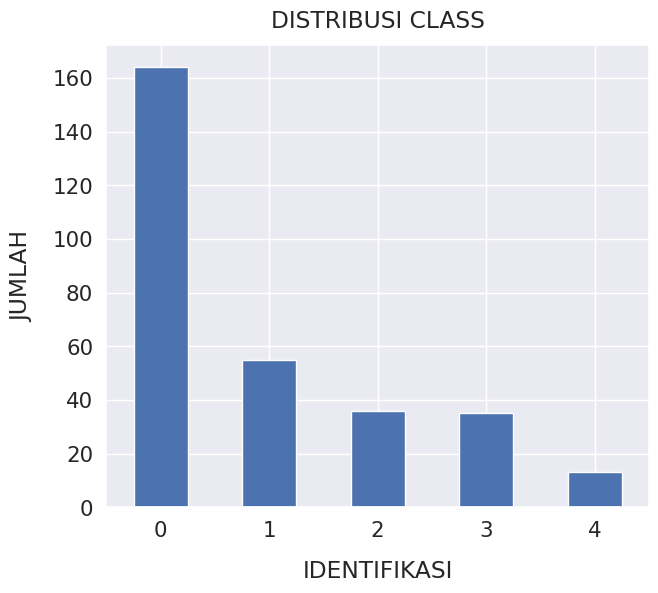

In [17]:
sns.set(font_scale=1.4)
dataset['num'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("IDENTIFIKASI", labelpad=14)
plt.ylabel("JUMLAH", labelpad=14)
plt.title("DISTRIBUSI CLASS", y=1.02);

## Cek Distribusi Age

In [ ]:
print(dataset['Age'].value_counts())

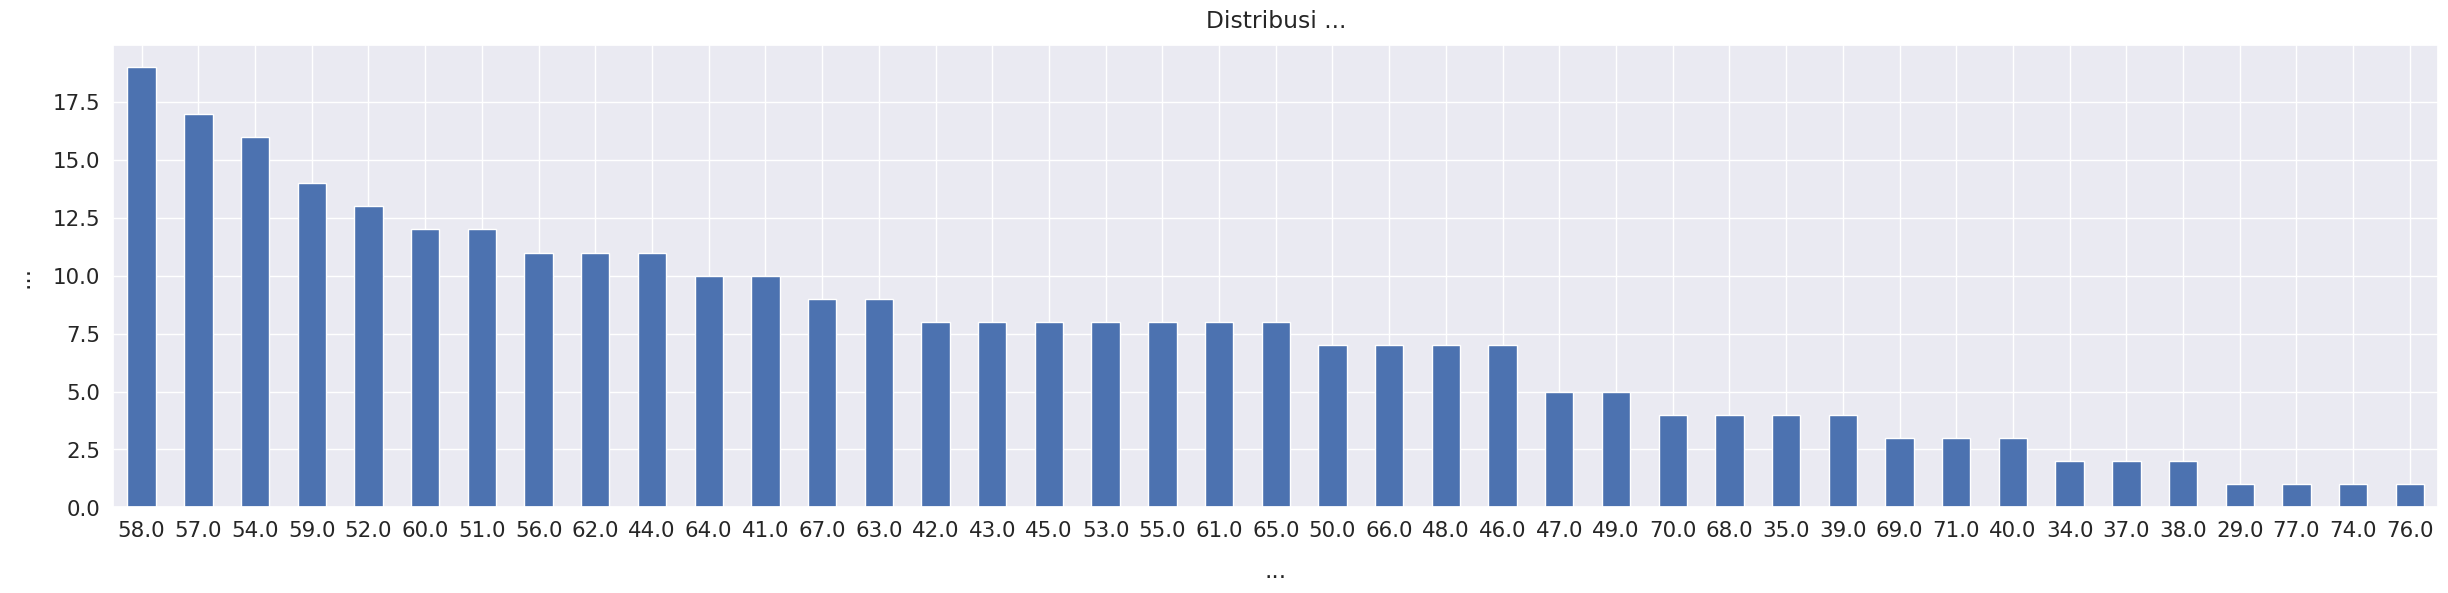

In [19]:
sns.set(font_scale=1.4)
dataset['Age'].value_counts().plot(kind='bar', figsize=(30, 6), rot=0)
plt.xlabel("...", labelpad=14)
plt.ylabel("...", labelpad=14)
plt.title("Distribusi ...", y=1.02);

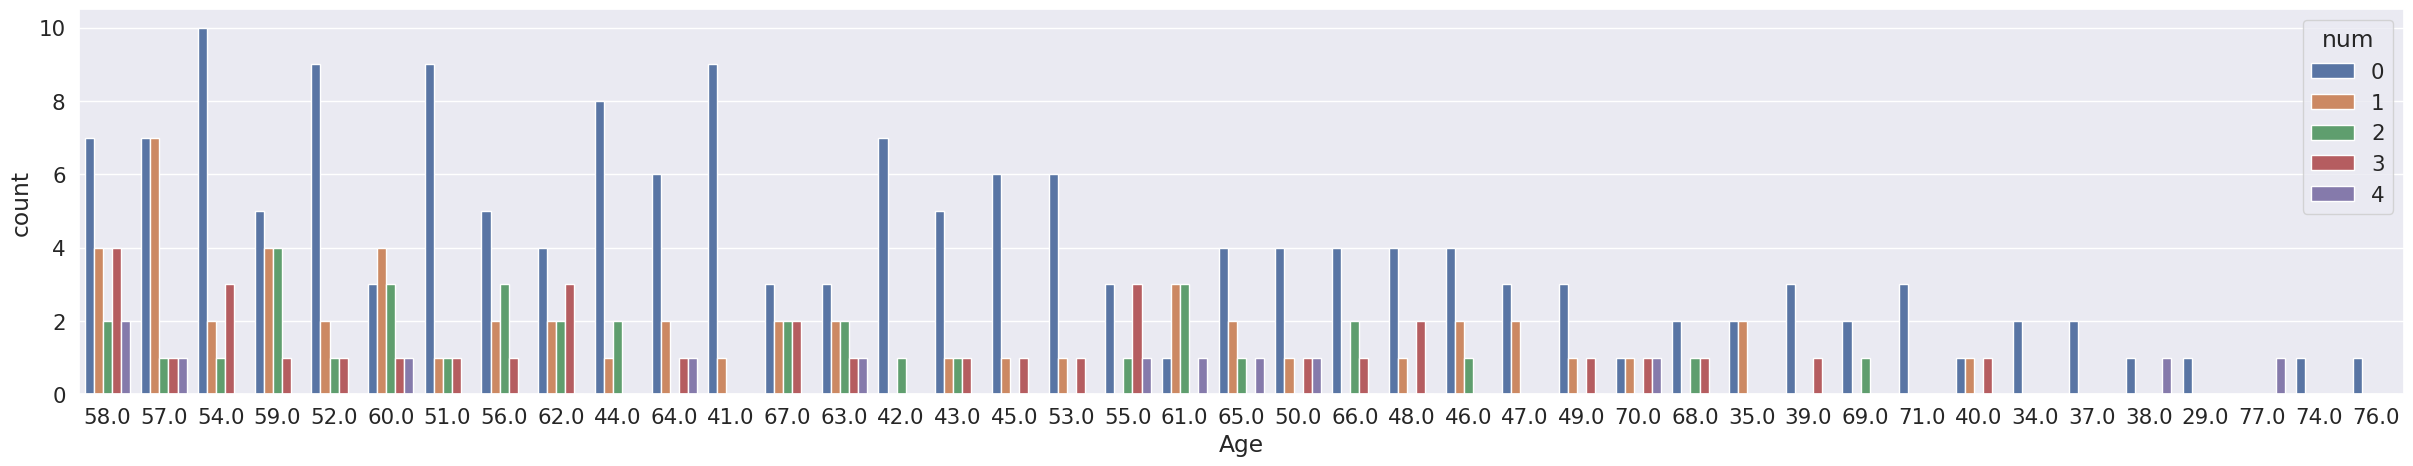

In [21]:
plt.subplots(figsize = (30,5))
sns.countplot(x=dataset['Age'],order=dataset['Age'].value_counts().index,hue=dataset['num'])
plt.show()

## Cek Distribusi Sex

In [22]:
print(dataset['Sex'].value_counts())

1.0    206
0.0     97
Name: Sex, dtype: int64


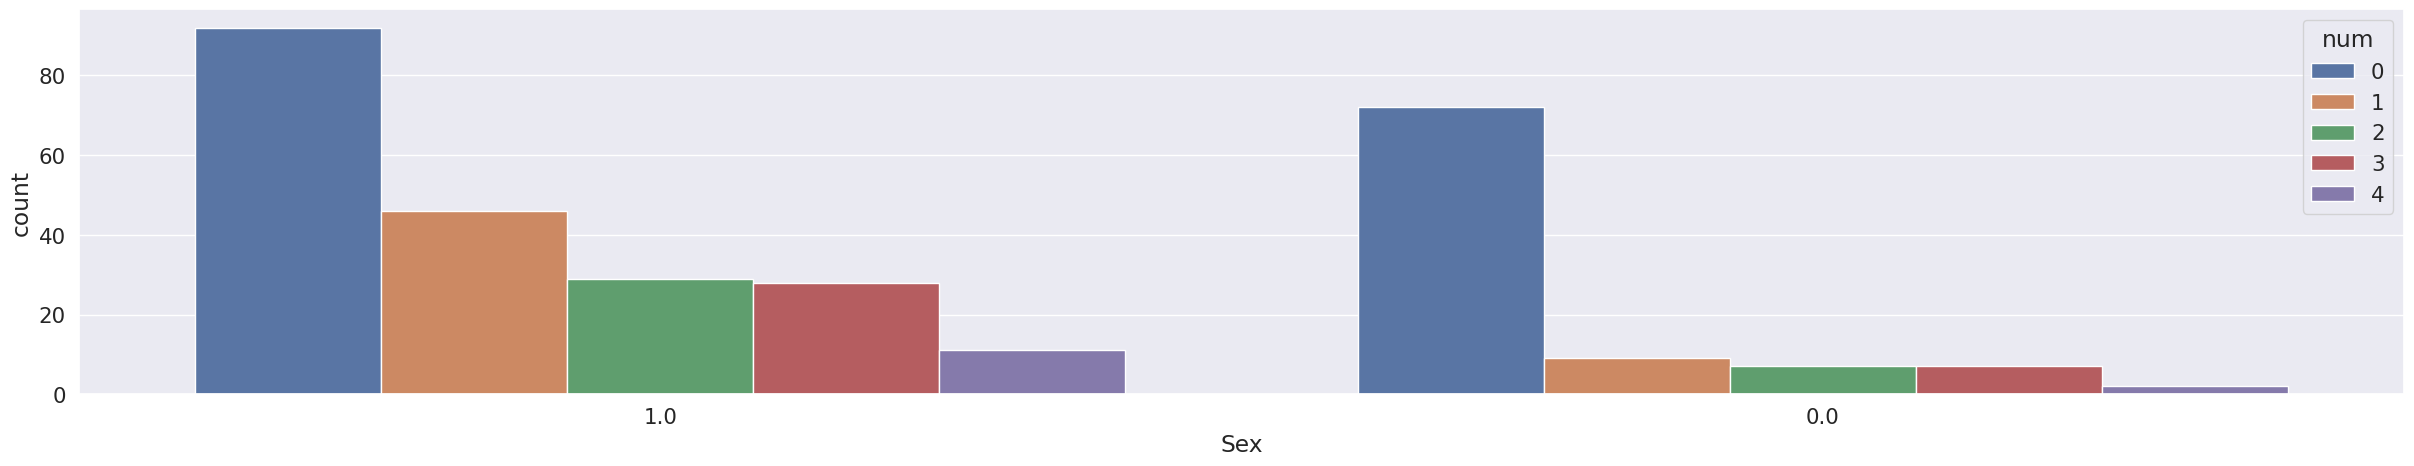

In [23]:
plt.subplots(figsize = (30,5))
sns.countplot(x=dataset['Sex'],order=dataset['Sex'].value_counts().index,hue=dataset['num'])
plt.show()

## Cek Distribusi Cp

In [24]:
print(dataset['Cp'].value_counts())

4.0    144
3.0     86
2.0     50
1.0     23
Name: Cp, dtype: int64


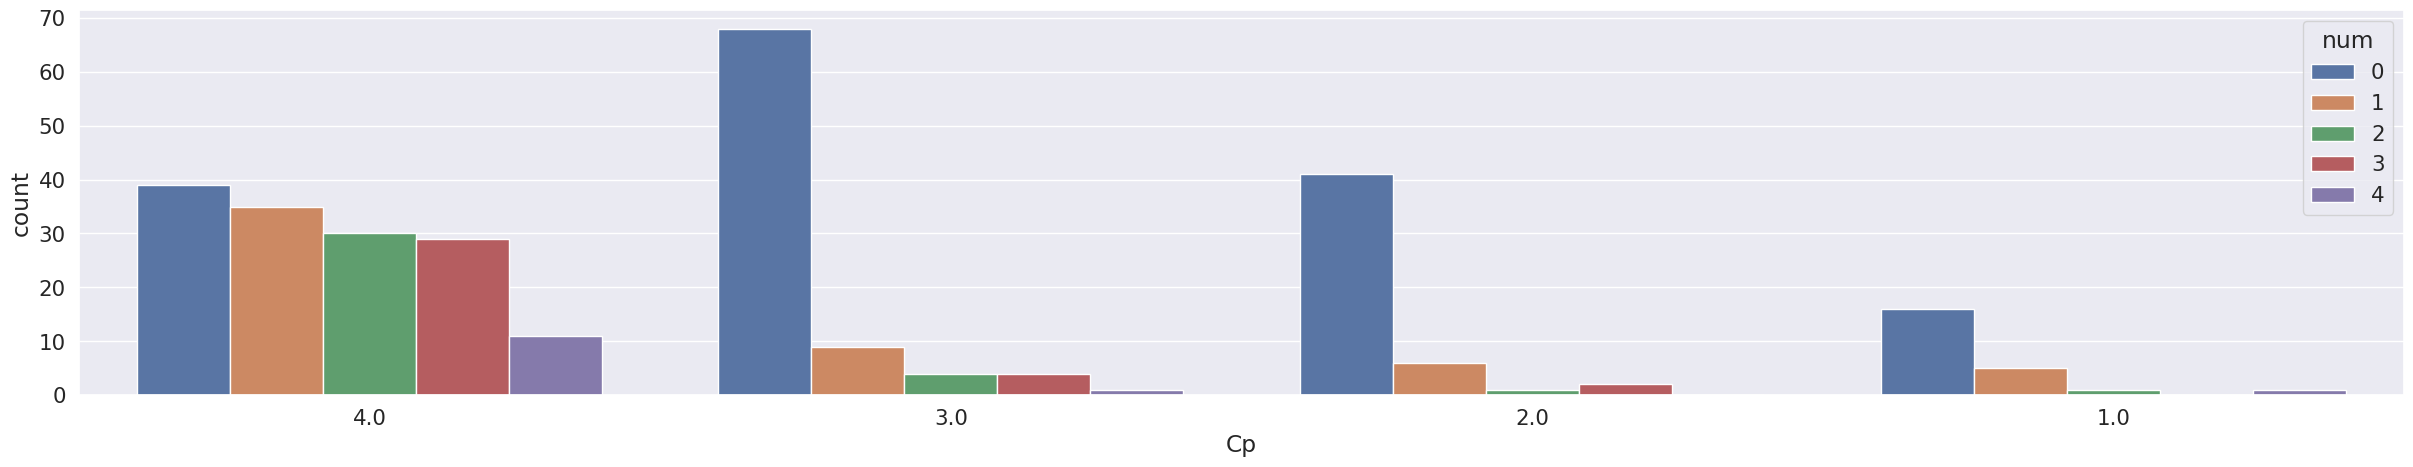

In [25]:
plt.subplots(figsize = (30,5))
sns.countplot(x=dataset['Cp'],order=dataset['Cp'].value_counts().index,hue=dataset['num'])
plt.show()

## Cek Distribusi Trestbps

In [26]:
print(dataset['Trestbps'].value_counts())

120.0    37
130.0    36
140.0    32
110.0    19
150.0    17
138.0    12
128.0    12
160.0    11
125.0    11
112.0     9
132.0     8
118.0     7
124.0     6
108.0     6
135.0     6
152.0     5
134.0     5
145.0     5
100.0     4
170.0     4
122.0     4
126.0     3
136.0     3
115.0     3
180.0     3
142.0     3
105.0     3
102.0     2
146.0     2
144.0     2
148.0     2
178.0     2
94.0      2
165.0     1
123.0     1
114.0     1
154.0     1
156.0     1
106.0     1
155.0     1
172.0     1
200.0     1
101.0     1
129.0     1
192.0     1
158.0     1
104.0     1
174.0     1
117.0     1
164.0     1
Name: Trestbps, dtype: int64


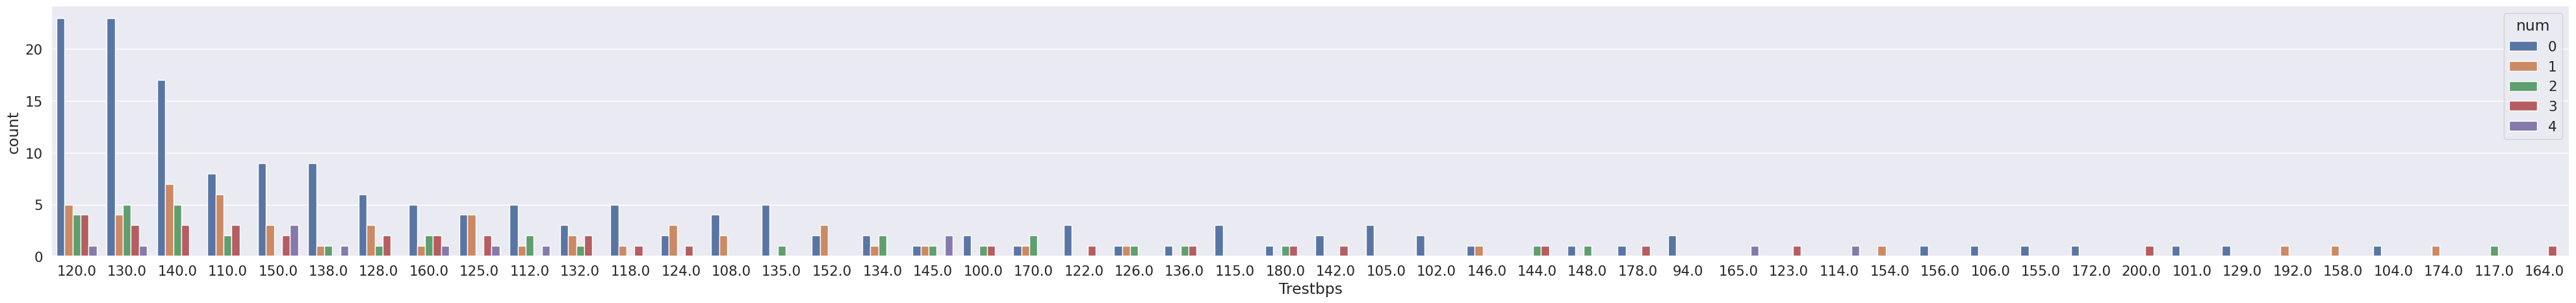

In [28]:
plt.subplots(figsize = (50,5))
sns.countplot(x=dataset['Trestbps'],order=dataset['Trestbps'].value_counts().index,hue=dataset['num'])
plt.show()

## Cek Distribusi Chol

In [29]:
print(dataset['Chol'].value_counts())

204.0    6
197.0    6
234.0    6
269.0    5
212.0    5
        ..
340.0    1
160.0    1
394.0    1
184.0    1
131.0    1
Name: Chol, Length: 152, dtype: int64


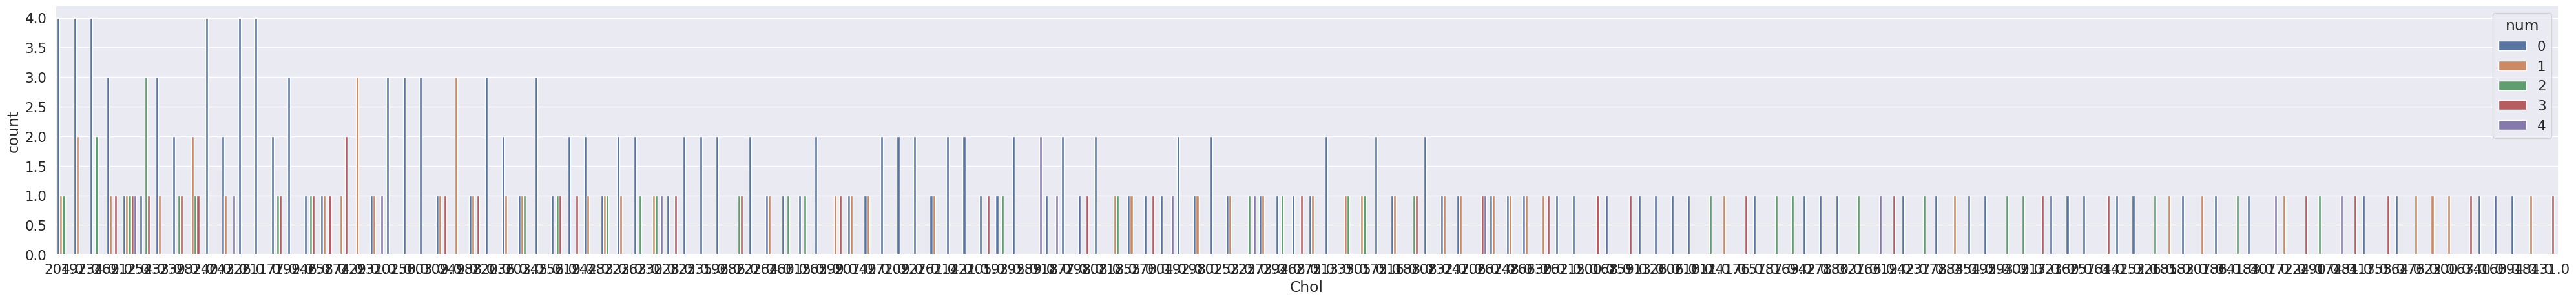

In [30]:
plt.subplots(figsize = (50,5))
sns.countplot(x=dataset['Chol'],order=dataset['Chol'].value_counts().index,hue=dataset['num'])
plt.show()

## Cek Distribusi Fbs

In [31]:
print(dataset['Fbs'].value_counts())

0.0    258
1.0     45
Name: Fbs, dtype: int64


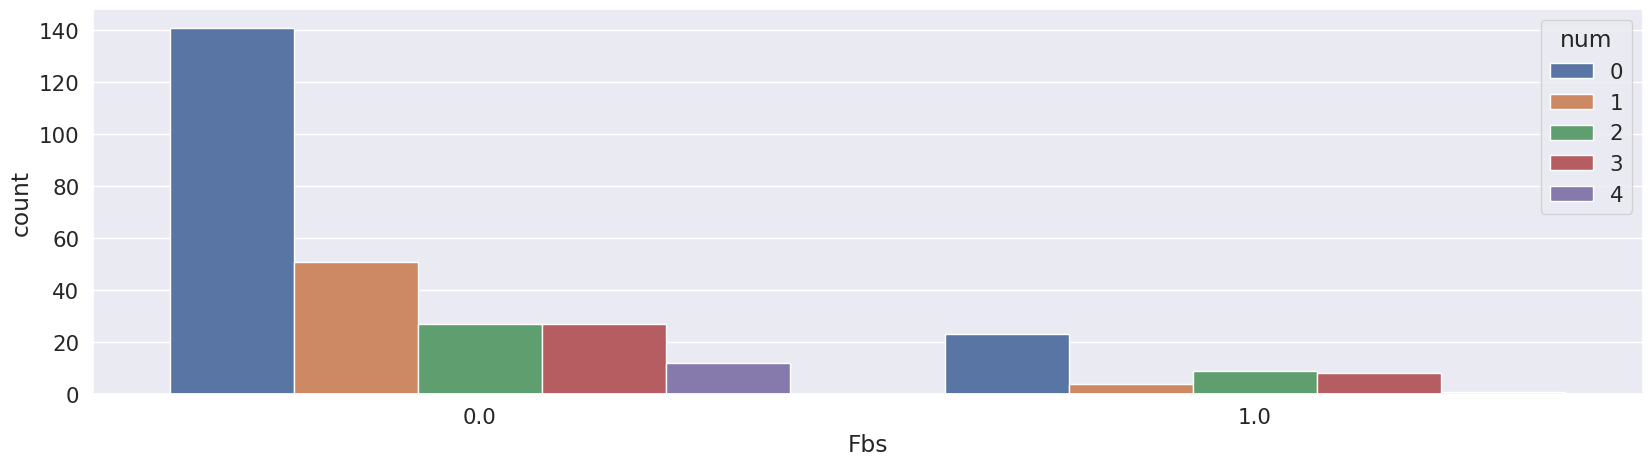

In [32]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['Fbs'],order=dataset['Fbs'].value_counts().index,hue=dataset['num'])
plt.show()

## Cek Distribusi Restecg

In [33]:
print(dataset['Restecg'].value_counts())

0.0    151
2.0    148
1.0      4
Name: Restecg, dtype: int64


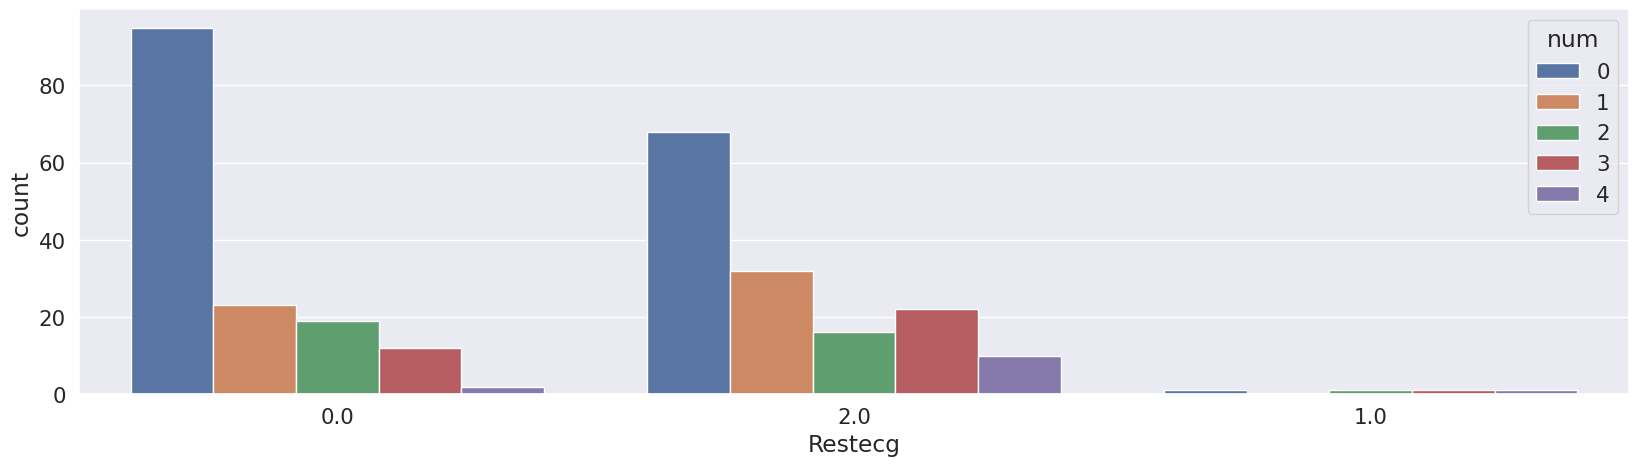

In [34]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['Restecg'],order=dataset['Restecg'].value_counts().index,hue=dataset['num'])
plt.show()

## Cek Distribusi Thalach

In [35]:
print(dataset['Thalach'].value_counts())

162.0    11
160.0     9
163.0     9
152.0     8
150.0     7
         ..
177.0     1
127.0     1
97.0      1
190.0     1
90.0      1
Name: Thalach, Length: 91, dtype: int64


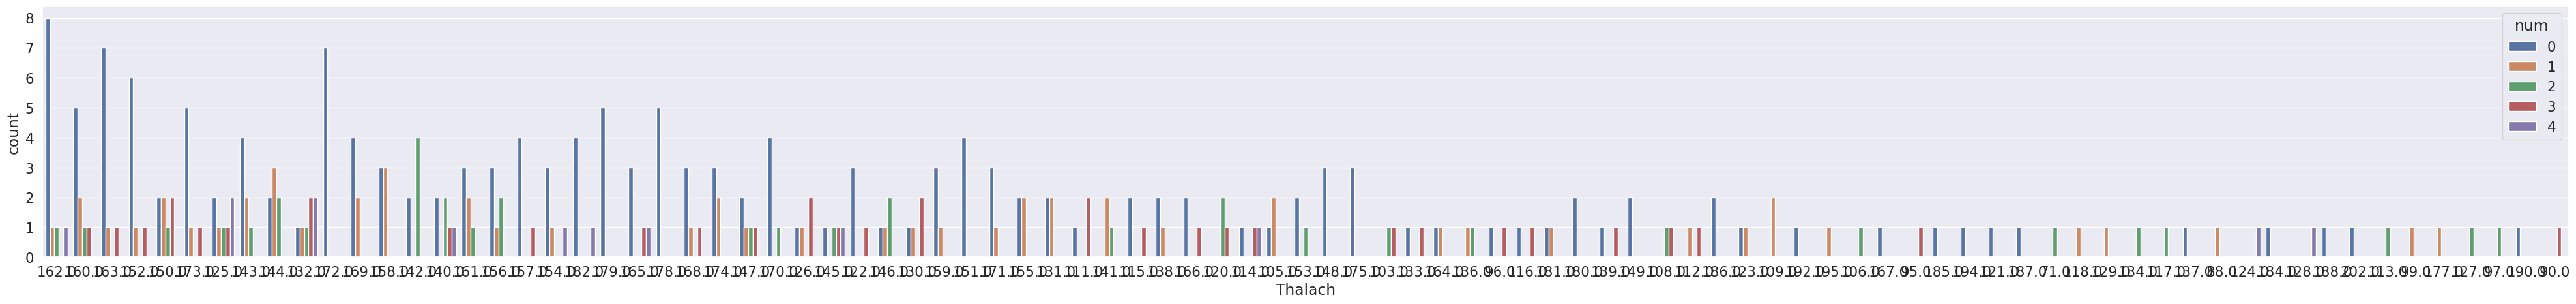

In [36]:
plt.subplots(figsize = (50,5))
sns.countplot(x=dataset['Thalach'],order=dataset['Thalach'].value_counts().index,hue=dataset['num'])
plt.show()

**temuan:**
- ada beberapa fitur yang bernilai `?`, maka dapat kita katakan, bahwa `?` merupakan penanda nilai yang hilang
- korelasi matrix tidak bekerja karena tipe data tidak tepat

## Cek Distribusi Exang

In [132]:
print(dataset['Exang'].value_counts())

0.0    204
1.0     99
Name: Exang, dtype: int64


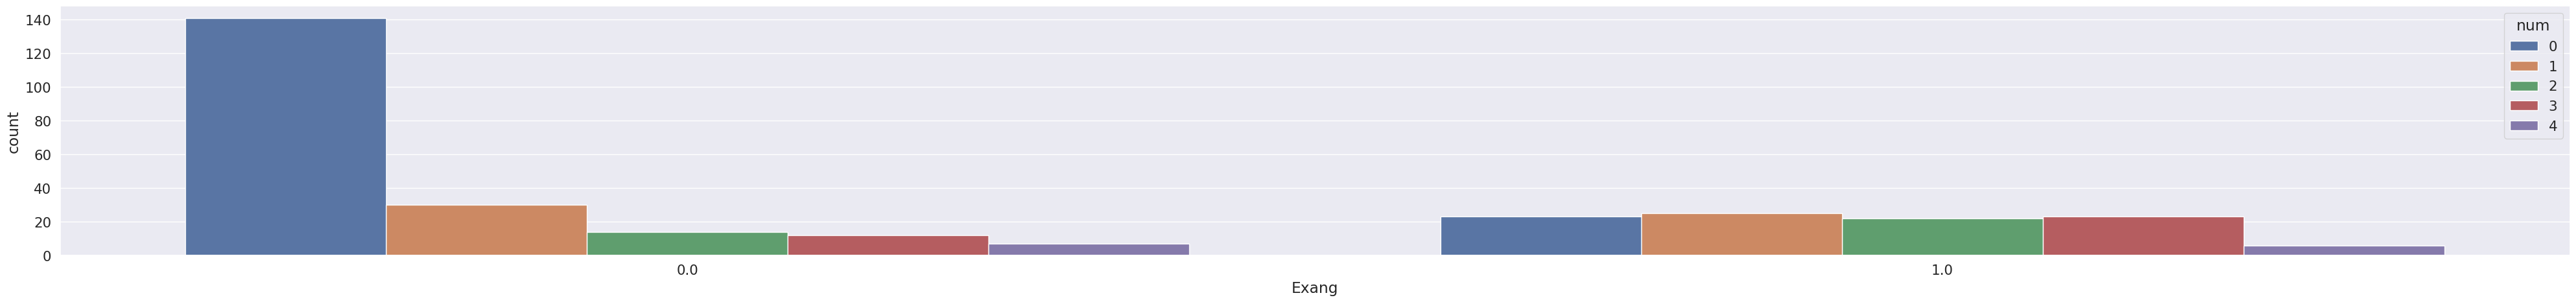

In [138]:
plt.subplots(figsize = (50,5))
sns.countplot(x=dataset['Exang'],order=dataset['Exang'].value_counts().index,hue=dataset['num'])
plt.show()

## Cek Distribusi Oldpeak

In [133]:
print(dataset['Oldpeak'].value_counts())

0.0    99
1.2    17
0.6    14
1.0    14
1.4    13
       ..
3.1     1
3.8     1
0.7     1
3.5     1
4.4     1
Name: Oldpeak, Length: 40, dtype: int64


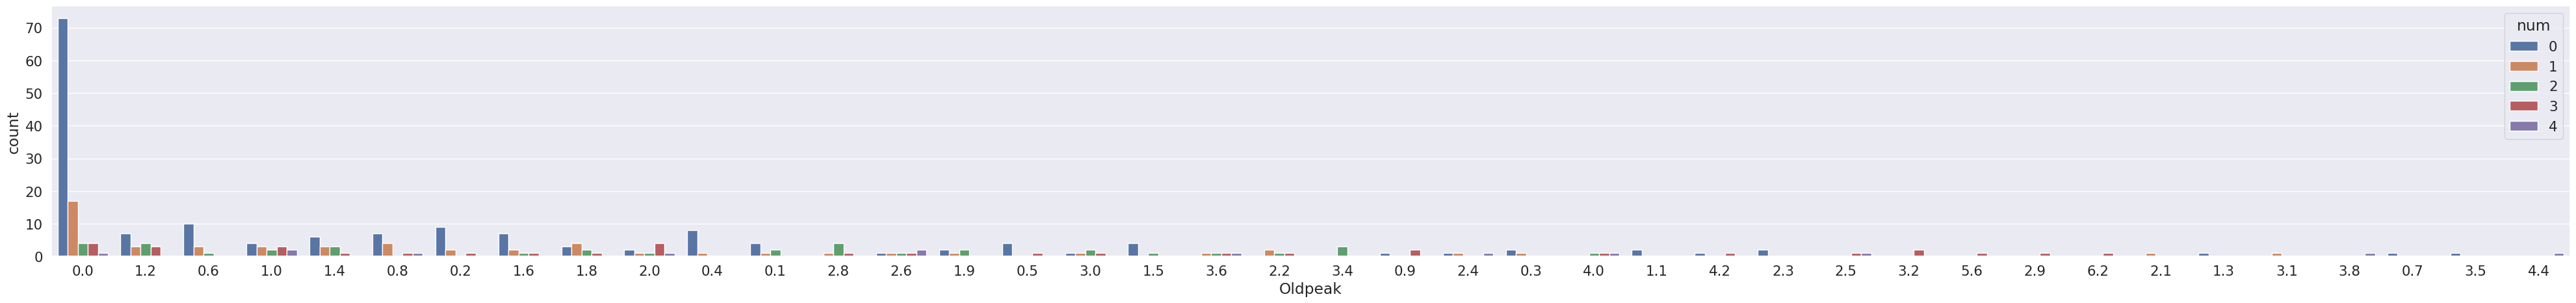

In [146]:
plt.subplots(figsize = (50,5))
sns.countplot(x=dataset['Oldpeak'],order=dataset['Oldpeak'].value_counts().index,hue=dataset['num'])
plt.show()

## Cek Distribusi Slope

In [134]:
print(dataset['Slope'].value_counts())

1.0    142
2.0    140
3.0     21
Name: Slope, dtype: int64


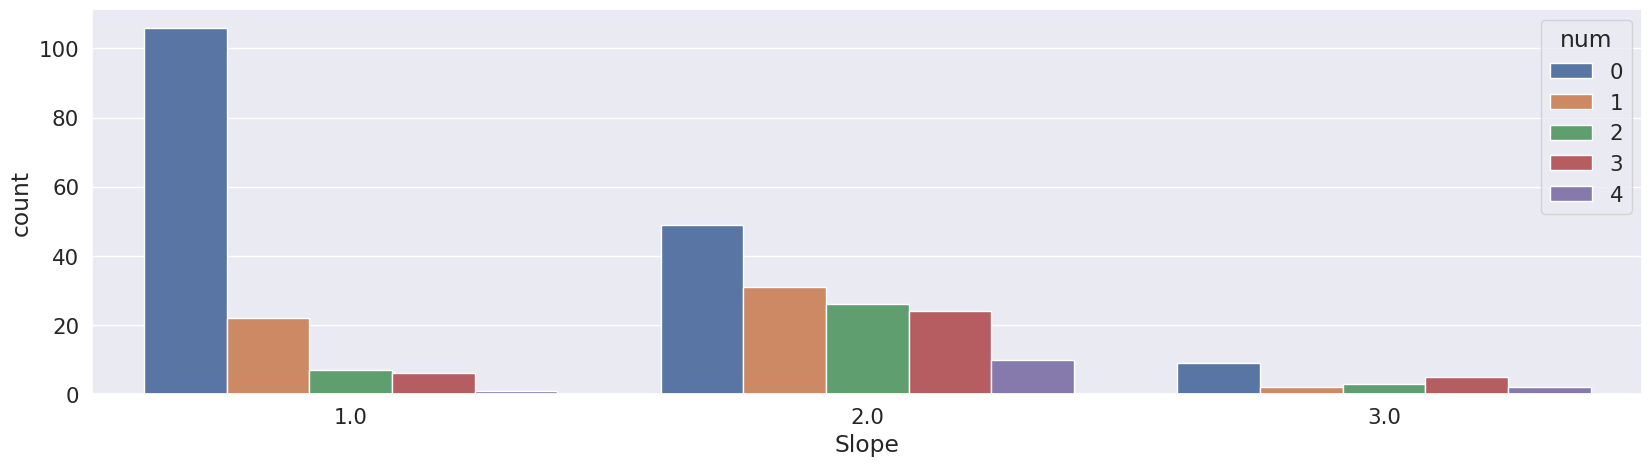

In [147]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['Slope'],order=dataset['Slope'].value_counts().index,hue=dataset['num'])
plt.show()

## Cek Distribusi Ca

In [135]:
print(dataset['Ca'].value_counts())

0.0    180
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64


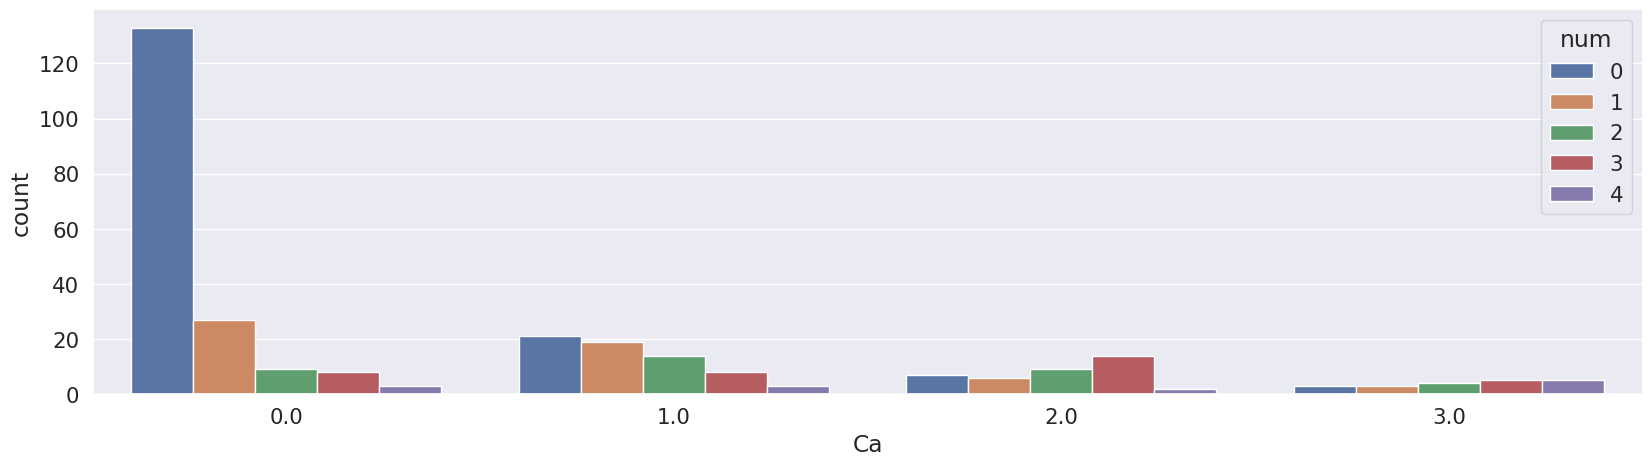

In [148]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['Ca'],order=dataset['Ca'].value_counts().index,hue=dataset['num'])
plt.show()

## Cek Distribusi Thal

In [136]:
print(dataset['Thal'].value_counts())

3.0    168
7.0    117
6.0     18
Name: Thal, dtype: int64


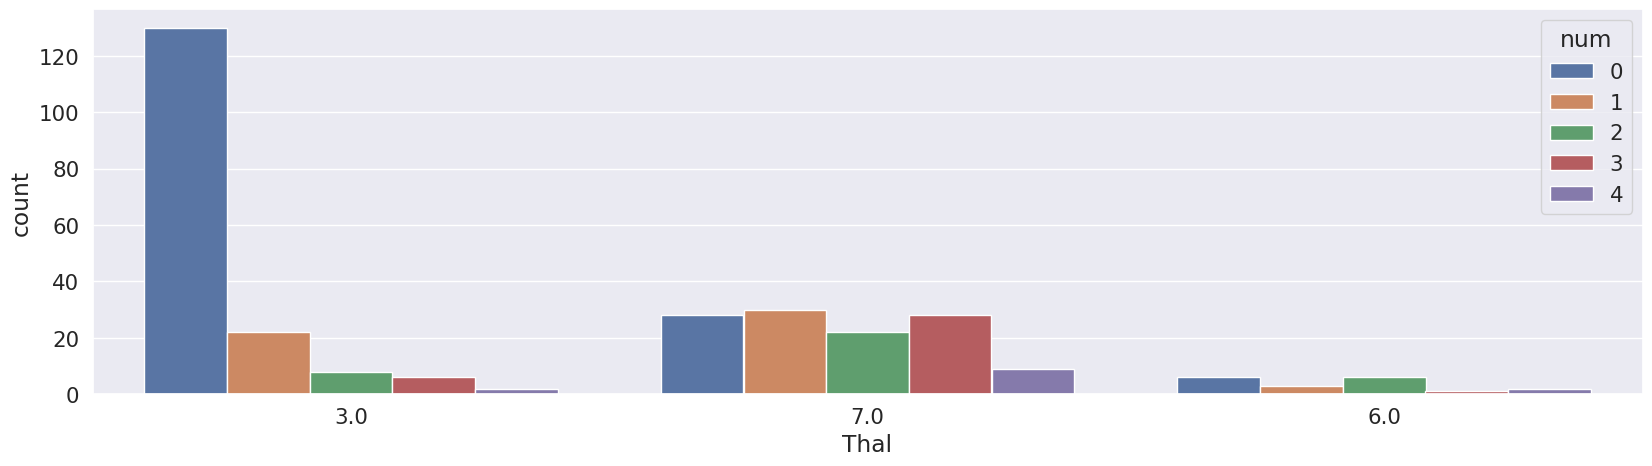

In [149]:
plt.subplots(figsize = (20,5))
sns.countplot(x=dataset['Thal'],order=dataset['Thal'].value_counts().index,hue=dataset['num'])
plt.show()

## Cek Distribusi num

In [137]:
print(dataset['num'].value_counts())

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64


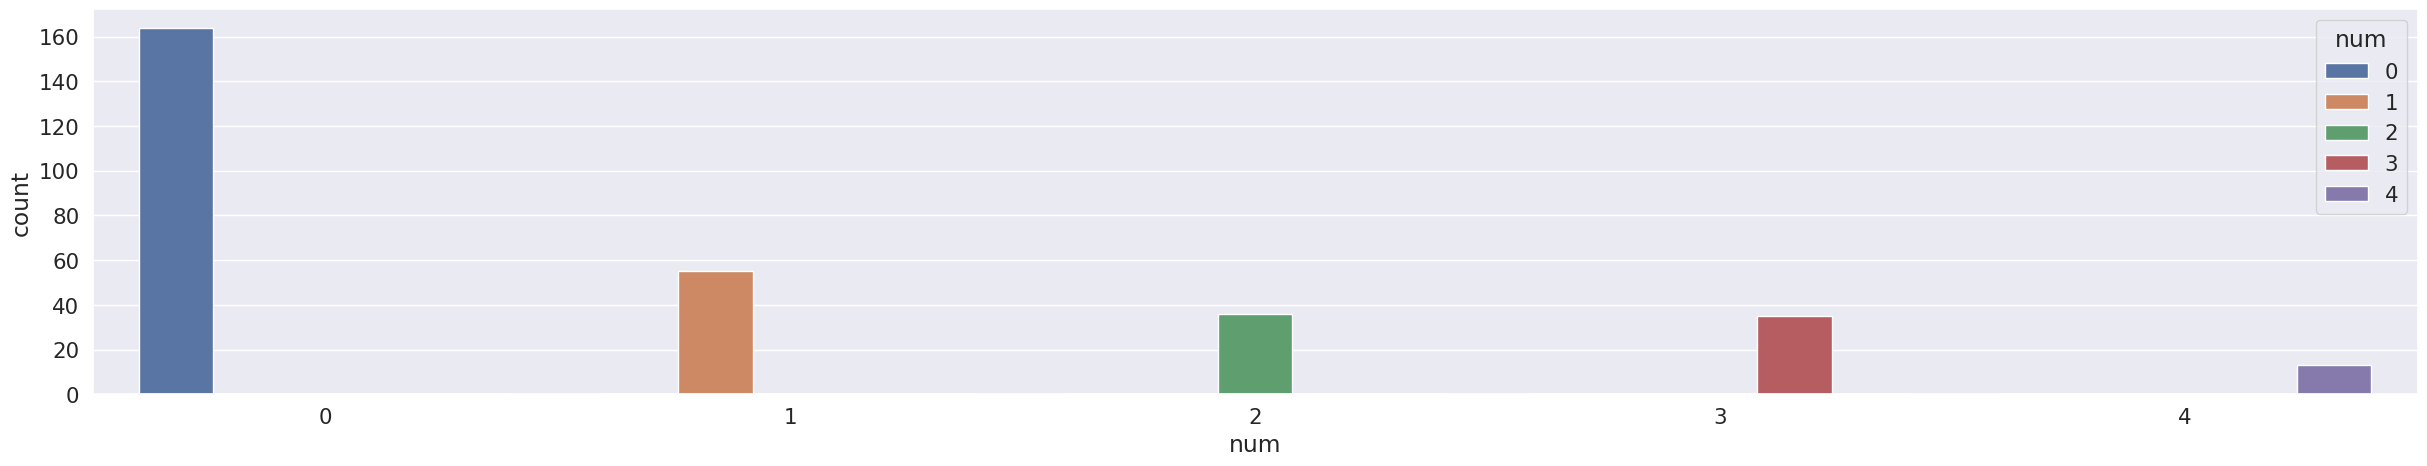

In [151]:
plt.subplots(figsize = (30,5))
sns.countplot(x=dataset['num'],order=dataset['num'].value_counts().index,hue=dataset['num'])
plt.show()

### cek korelasi tahap 1

<ipython-input-39-3f5d6d881738>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


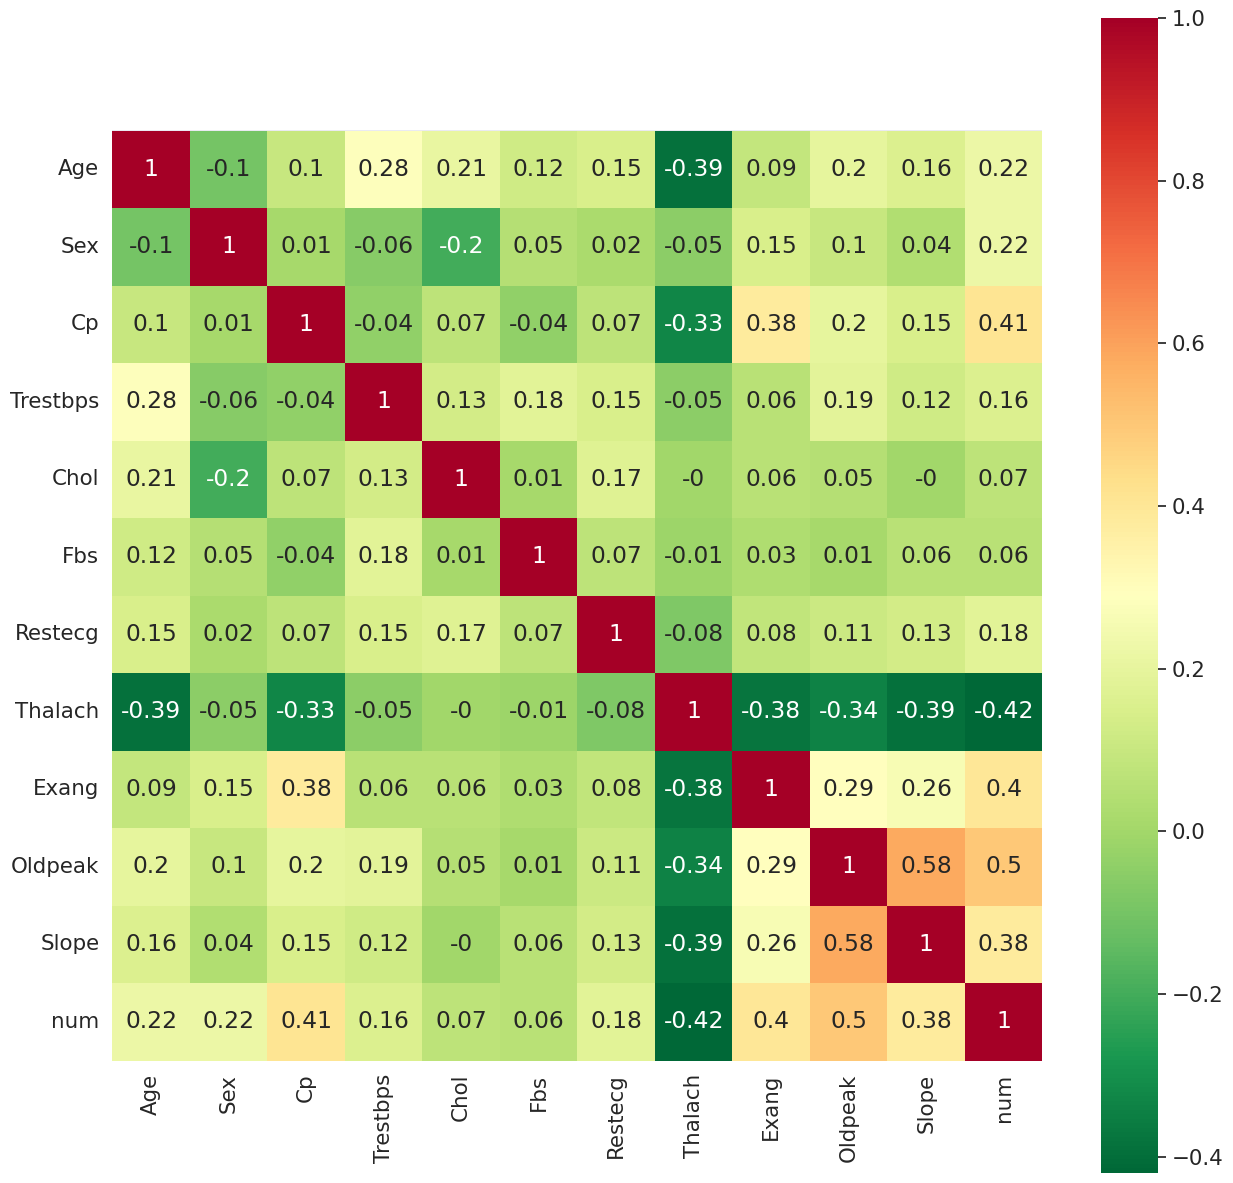

In [39]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

## BAB 3 – (J.62DMI00.006.1) memvalidasi data

**temuan**:
- Penilaian kualitas data sesuai dengan tujuan teknis data science, dengan sajian sebagaimana hasil analisis karakteristik data
- Penilaian tingkat kecukupan data sesuai dengan tujuan teknis data science, dengan sajian sebagaimana hasil analisis karakteristik data
- ada beberapa fitur yang nilainya hilang, harus digunakan tahapan **`memperbaiki nilai yang hilang`**
- distribusi class **`imbalanced`**, disini asesi **tidak melakukan proses perbaikan imbalanced learning**

## BAB 4 – (J.62DMI00.007.1) menentukan object data
silakan generate table menggunakan https://www.tablesgenerator.com/markdown_tables

**temuan**:

|Nama             | Deskripsi|
|-----------------|---------|
| **CLASS**       | **Label**   |
| xxx             | Atribut |
| xxx             | Atribut |


## BAB 5 – (J.62DMI00.008.1) membersihkan data

### Memperbaiki nilai yang hilang

nilai yang hilang, ditulis dalam bentuk ?, maka kita rubah menjadi NaN

**silakan rubah tanda tanya**

In [40]:
dataset.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [41]:
dataset.replace("?", np.nan, inplace= True)

### cek bentuk dataset

In [42]:
dataset.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [43]:
dataset.tail()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


### tahap memperbaiki nilai yang hilang


In [44]:
dataset.isnull().values.any()

True

In [45]:
dataset.loc[:, dataset.isnull().any()].columns

Index(['Ca', 'Thal'], dtype='object')

In [46]:
dataset.loc[:,list(dataset.loc[:,dataset.isnull().any()].columns)].isnull().sum()/(len(dataset))*100

Ca      1.320132
Thal    0.660066
dtype: float64

**temuan**:

<Axes: >

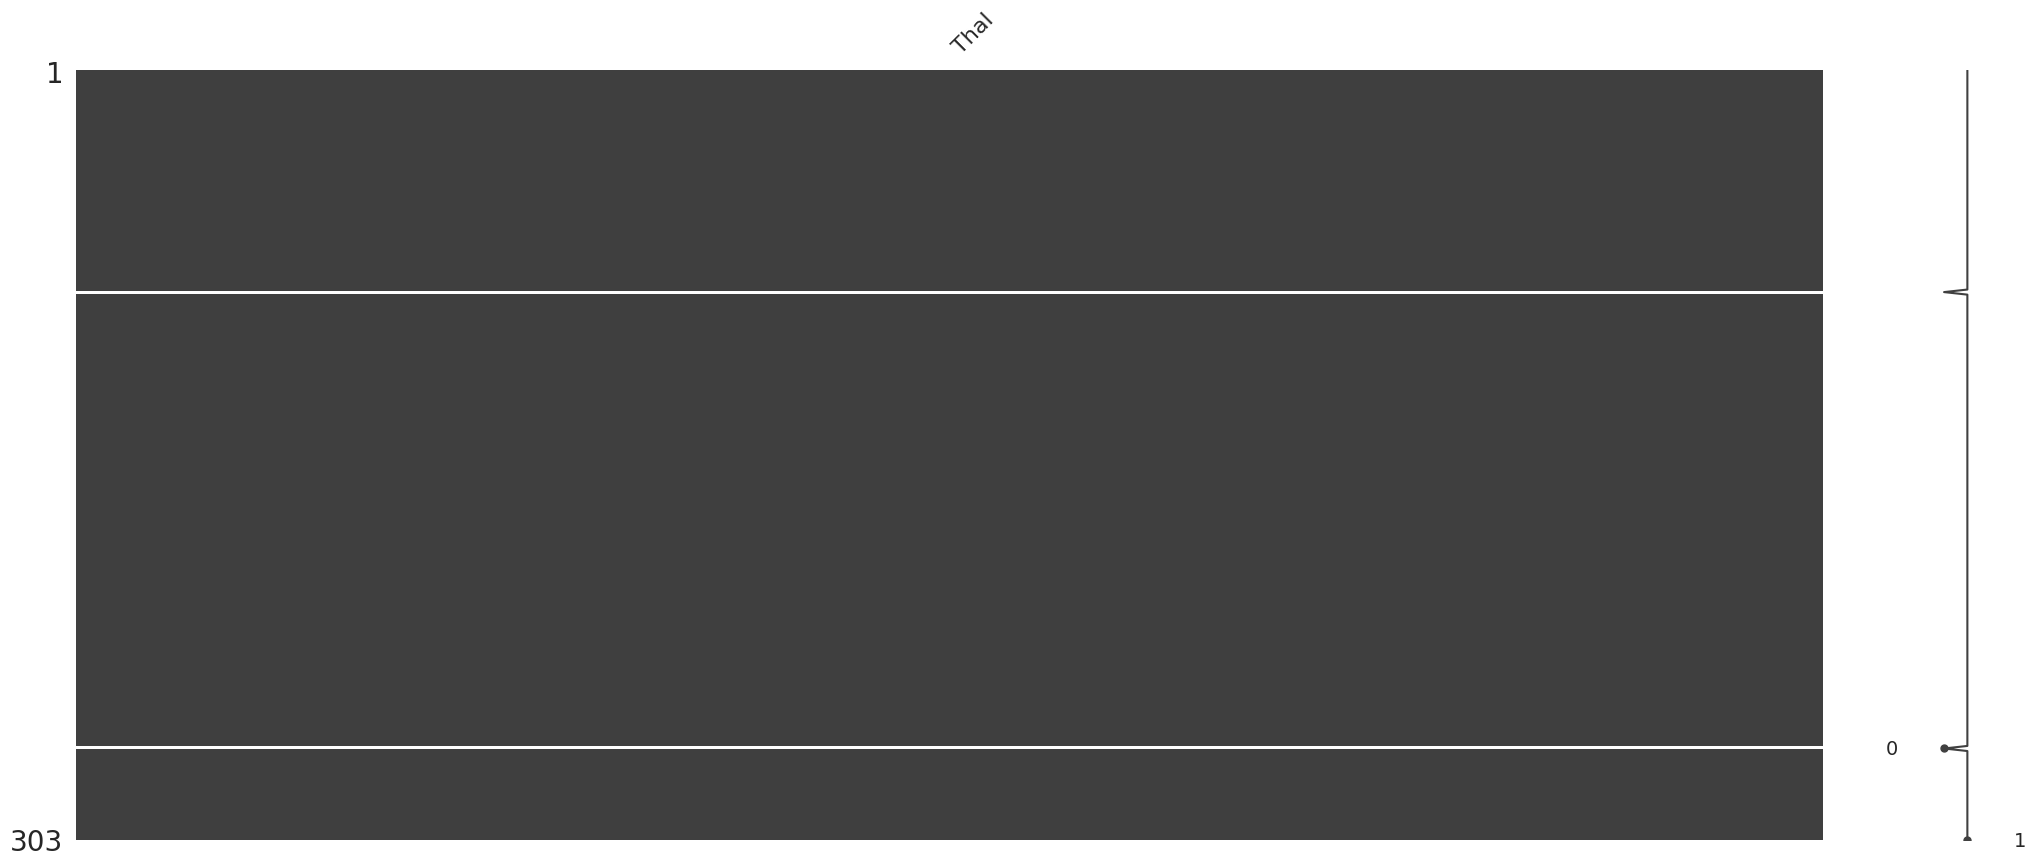

In [49]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

**silakan gunakan sesuai kebutuhan**

In [ ]:
# hapus fitur jika fitur yang hilang lebih dari 50%
# dataset.drop(['fitur'], axis="columns", inplace=True)

In [48]:
# Perbaiki xxx
median_value=dataset['Ca'].median()
dataset['Ca']=dataset['Ca'].fillna(median_value)


In [50]:
# Perbaiki xxx
median_value=dataset['Thal'].median()
dataset['Thal']=dataset['Thal'].fillna(median_value)


cek kembali

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    float64
 1   Sex       303 non-null    float64
 2   Cp        303 non-null    float64
 3   Trestbps  303 non-null    float64
 4   Chol      303 non-null    float64
 5   Fbs       303 non-null    float64
 6   Restecg   303 non-null    float64
 7   Thalach   303 non-null    float64
 8   Exang     303 non-null    float64
 9   Oldpeak   303 non-null    float64
 10  Slope     303 non-null    float64
 11  Ca        303 non-null    object 
 12  Thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [52]:
dataset.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**temuan**: meski sudah diperbaiki, namun tipe data masih Object, maka perlu dirubah menjadi int atau Float. untuk menentukan tersebut, perlu dilihat kembali distribusi data

## BAB 6 – (J.62DMI00.009.1) mengkonstruksi data

**silakan pakai sesuai kebutuhan**

In [53]:
dataset['Ca'] = dataset['Ca'].astype(str).astype(float)


In [54]:
dataset['Thal'] = dataset['Thal'].astype(str).astype(float)

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    float64
 1   Sex       303 non-null    float64
 2   Cp        303 non-null    float64
 3   Trestbps  303 non-null    float64
 4   Chol      303 non-null    float64
 5   Fbs       303 non-null    float64
 6   Restecg   303 non-null    float64
 7   Thalach   303 non-null    float64
 8   Exang     303 non-null    float64
 9   Oldpeak   303 non-null    float64
 10  Slope     303 non-null    float64
 11  Ca        303 non-null    float64
 12  Thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [56]:
dataset.describe()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


### menghapus nilai yang bernilai konstan

In [57]:
dataset.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    float64
 1   Sex       303 non-null    float64
 2   Cp        303 non-null    float64
 3   Trestbps  303 non-null    float64
 4   Chol      303 non-null    float64
 5   Fbs       303 non-null    float64
 6   Restecg   303 non-null    float64
 7   Thalach   303 non-null    float64
 8   Exang     303 non-null    float64
 9   Oldpeak   303 non-null    float64
 10  Slope     303 non-null    float64
 11  Ca        303 non-null    float64
 12  Thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [59]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    float64
 1   Sex       303 non-null    float64
 2   Cp        303 non-null    float64
 3   Trestbps  303 non-null    float64
 4   Chol      303 non-null    float64
 5   Fbs       303 non-null    float64
 6   Restecg   303 non-null    float64
 7   Thalach   303 non-null    float64
 8   Exang     303 non-null    float64
 9   Oldpeak   303 non-null    float64
 10  Slope     303 non-null    float64
 11  Ca        303 non-null    float64
 12  Thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


### cek Korelasi

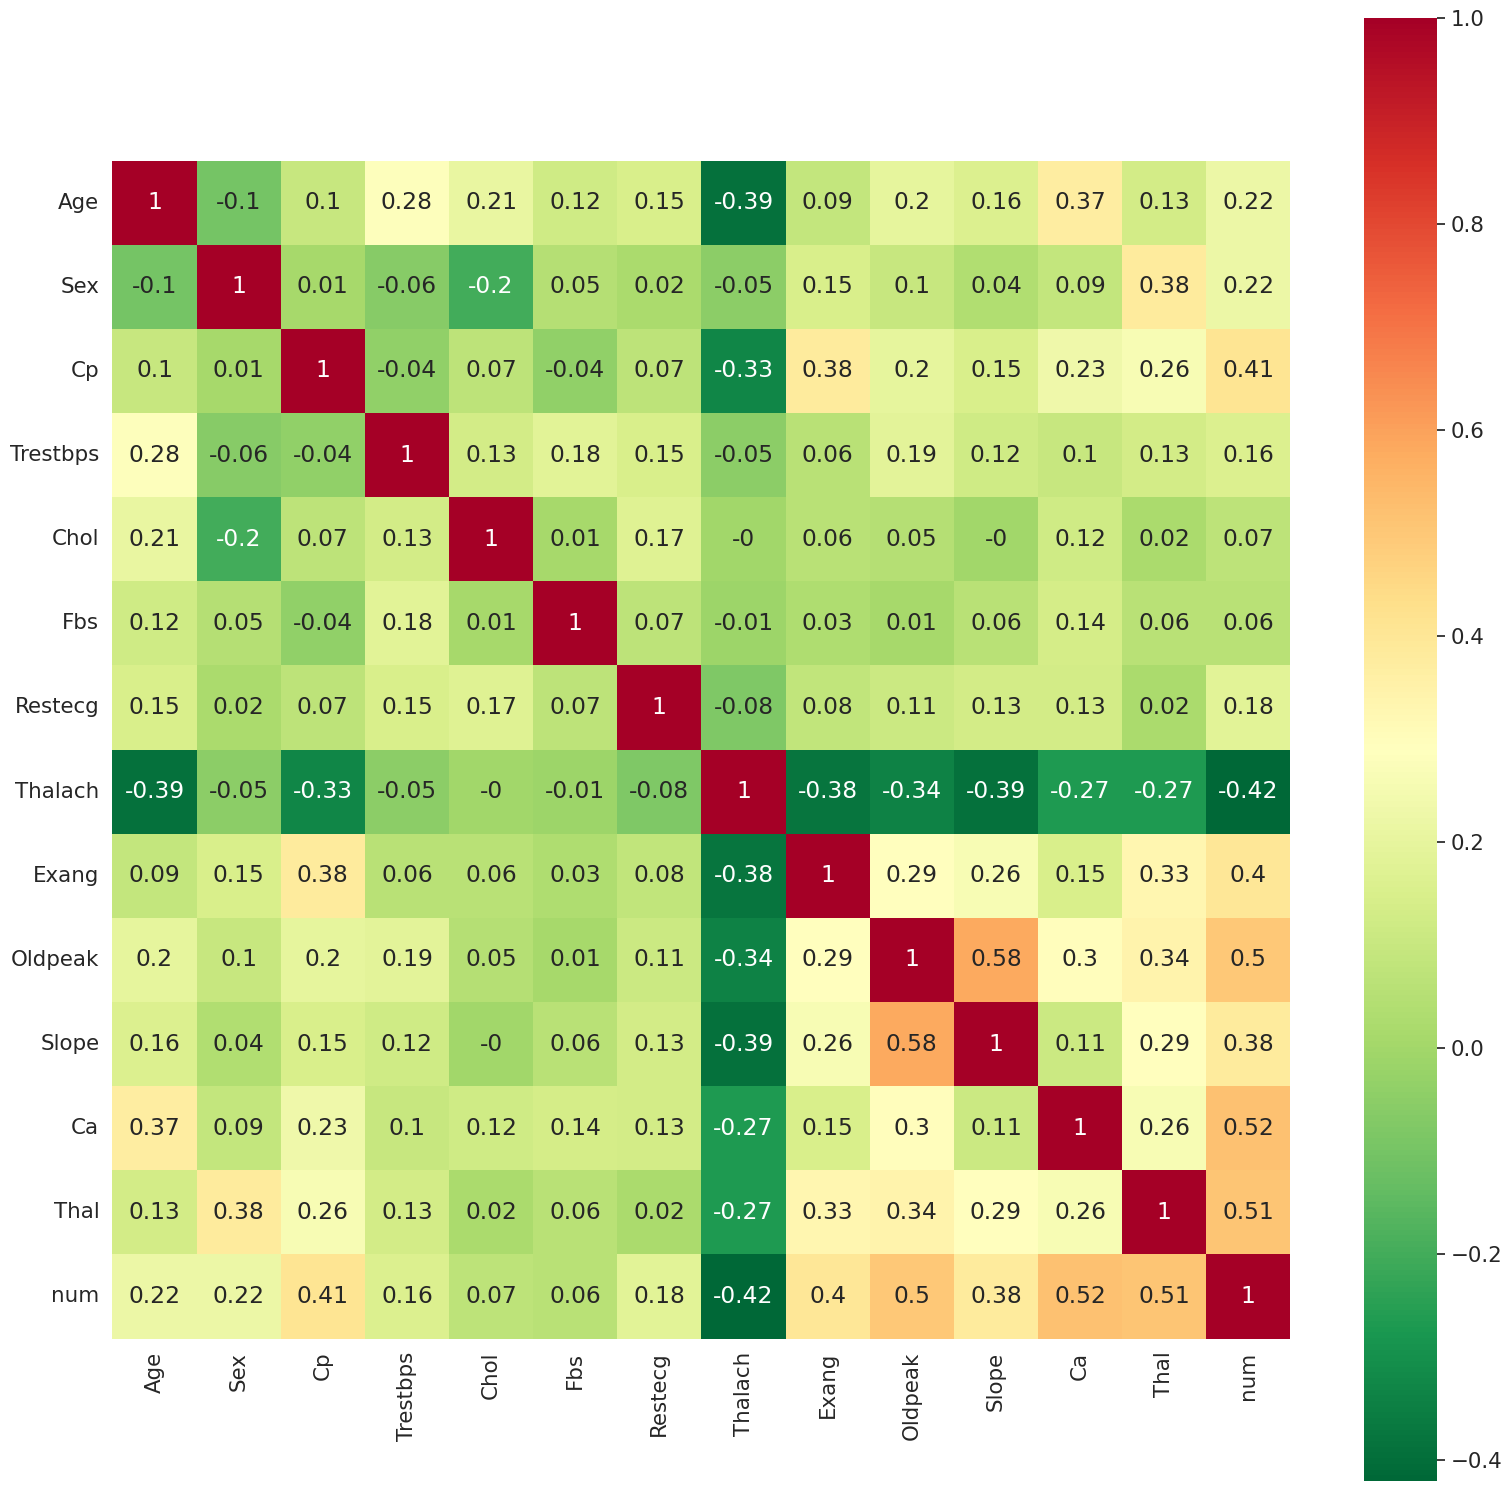

In [61]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (19,19))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

### cek boxplot

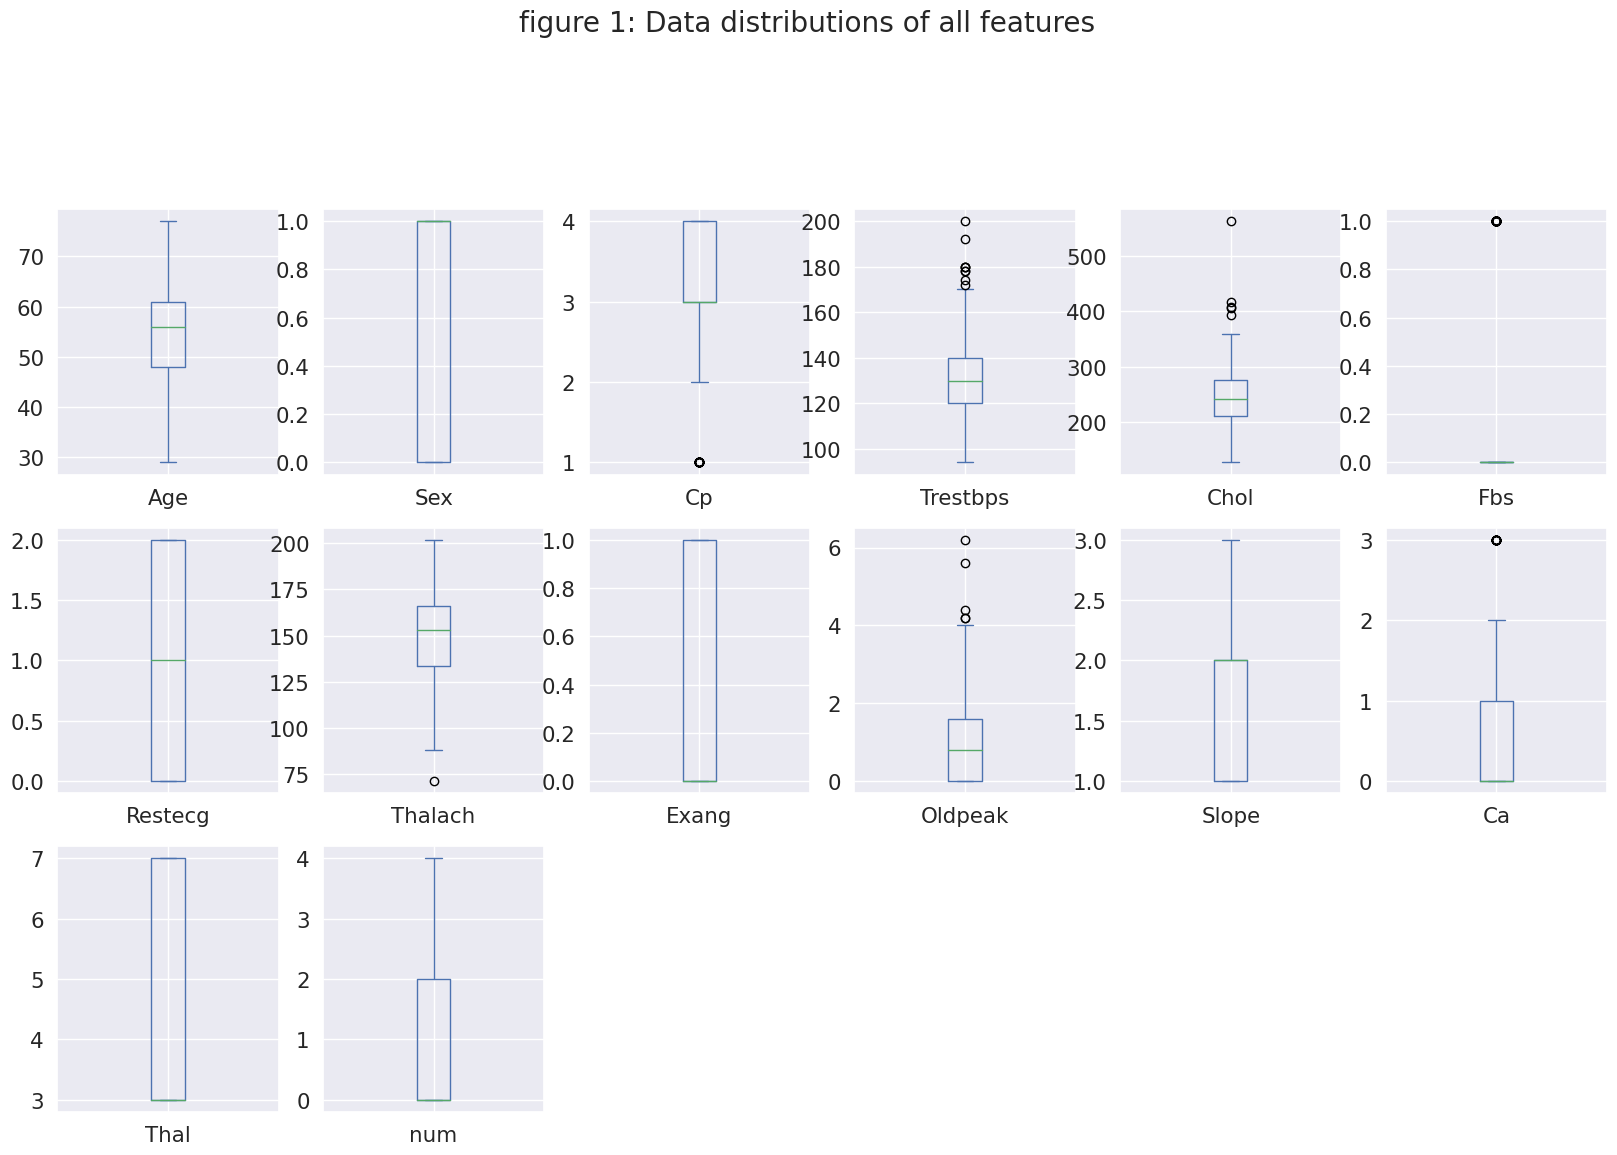

In [62]:
dataset.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (20,20),
                           title='figure 1: Data distributions of all features')
plt.show()

## BAB 7 – (J.62DMI00.010.1) menentukan label data

**silakan diganti**

In [63]:
y = dataset['num']

In [64]:
y

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: num, Length: 303, dtype: int64

In [65]:
X = dataset.drop(['num'], 1)

<ipython-input-65-4806939888b3>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dataset.drop(['num'], 1)


In [66]:
X

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


<img src="https://live.staticflickr.com/65535/52438712492_4827412d72_o.png" width="923" height="228" alt="gb1 (1)">

### Perlakukan data original

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=ukuran_test, random_state=42)

### Perlakuan data normal

In [69]:
X_norm = StandardScaler().fit_transform(X)

In [70]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm,y, test_size=ukuran_test, random_state=42)

### Perlakuan data original PCA

In [71]:
pca = PCA(random_state=42)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(ori_pca_array)
print("Heads of features:",ori_pca.head())
var_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("Singular Value:",sv)

Heads of features:           0          1          2          3         4         5         6   \
0 -12.665422   2.816279  14.992618   6.795984 -1.078475  0.682857  0.173881   
1  41.303628  45.289369  21.823962   0.083864  2.739570  0.989639 -0.770195   
2 -17.676068  21.578740 -11.567503  11.126278 -2.462890  1.279392 -0.621257   
3   2.400054 -39.913487   0.825560 -10.702652 -0.059102  2.973355  2.149224   
4 -43.291675 -23.860984   1.860055  -7.886838  1.204136  1.211934 -0.565039   

         7         8         9         10        11        12  
0  2.867288 -0.174296  0.733162 -0.286089 -0.324111  0.628685  
1 -1.185863  1.360030  0.080962 -0.751188 -0.060823 -0.485932  
2 -0.100121  0.123092 -0.217923 -0.196525  0.289632 -0.192335  
3  0.110518 -0.621591  0.560694 -0.350934 -0.616951 -0.161037  
4  0.991922  0.165271 -0.447878  0.749352  0.499795  0.078749  
Explained variance ratio: [7.46500715e-01 1.50077697e-01 8.51123741e-02 1.61233450e-02
 1.02191774e-03 3.31412482e-04 2.53

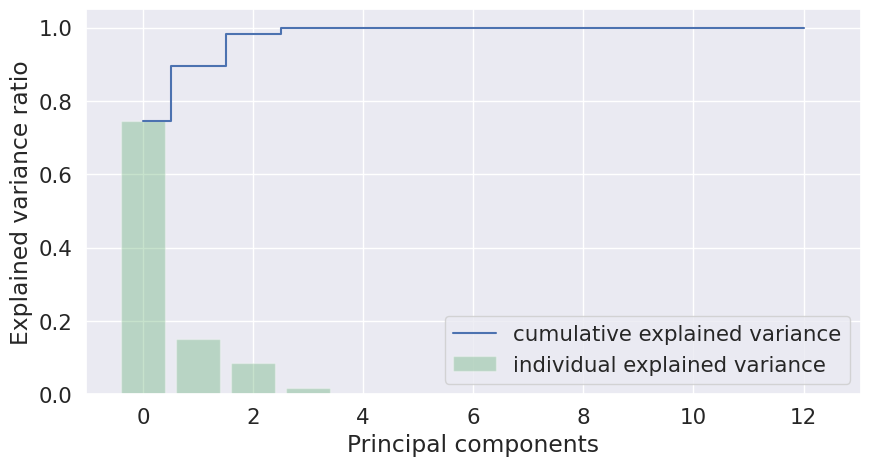

Cumulative explained ratio: [0.74650071 0.89657841 0.98169079 0.99781413 0.99883605 0.99916746
 0.99942065 0.99964371 0.99981931 0.99987862 0.99992752 0.99996796
 1.        ]


In [72]:
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),
        var_ratio,
        alpha=0.3333,
        align='center',
        label='individual explained variance',
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio,
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

print("Cumulative explained ratio:",cum_var_ratio)

In [74]:
pca = PCA(n_components=3, random_state=42)
pca.fit(X)
ori_pca_array = pca.transform(X)
ori_pca = pd.DataFrame(data=ori_pca_array, columns = ['PC0','PC1','PC2'])

In [75]:
ori_pca

,PC0,PC1,PC2
0,-12.665422,2.816279,14.992618
1,41.303628,45.289369,21.823962
2,-17.676068,21.578740,-11.567503
3,2.400054,-39.913487,0.825560
4,-43.291675,-23.860984,1.860055
...,...,...,...
298,15.874379,12.956685,-25.698882
299,-52.404646,13.137756,15.630417
300,-115.314206,36.033775,0.420619
301,-10.749050,-23.443452,2.418430


In [76]:
X_train

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal
284,61.0,1.0,4.0,148.0,203.0,0.0,0.0,161.0,0.0,0.0,1.0,1.0,7.0
198,50.0,0.0,2.0,120.0,244.0,0.0,0.0,162.0,0.0,1.1,1.0,0.0,3.0
42,71.0,0.0,2.0,160.0,302.0,0.0,0.0,162.0,0.0,0.4,1.0,2.0,3.0
17,54.0,1.0,4.0,140.0,239.0,0.0,0.0,160.0,0.0,1.2,1.0,0.0,3.0
168,35.0,1.0,4.0,126.0,282.0,0.0,2.0,156.0,1.0,0.0,1.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,54.0,1.0,2.0,192.0,283.0,0.0,2.0,195.0,0.0,0.0,1.0,1.0,7.0
71,67.0,1.0,4.0,125.0,254.0,1.0,0.0,163.0,0.0,0.2,2.0,2.0,7.0
106,59.0,1.0,4.0,140.0,177.0,0.0,0.0,162.0,1.0,0.0,1.0,1.0,7.0
270,61.0,1.0,4.0,140.0,207.0,0.0,2.0,138.0,1.0,1.9,1.0,1.0,7.0


In [77]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(ori_pca,y, test_size=ukuran_test, random_state=42)

### Perlakuan data normal PCA

In [78]:
pca = PCA(random_state=42)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(norm_pca_array)
print("Heads of features:",norm_pca.head())
var_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:",var_ratio)
sv = pca.singular_values_
print("Singular Value:",sv)

Heads of features:          0         1         2         3         4         5         6   \
0  1.162722  0.929622  3.212341  2.248647 -0.117105  0.164221  0.966571   
1  3.217830  1.451021 -0.481532 -0.849814  0.138780 -0.631340  0.403677   
2  3.143604 -0.636569 -0.364301 -0.607485 -0.045832 -1.003931  0.681505   
3 -0.464908 -1.409706  0.395323  2.797258 -0.874659 -0.160742 -0.644582   
4 -2.268663  0.388683 -0.068956  1.170135 -0.839176 -0.141872  0.729038   

         7         8         9         10        11        12  
0  0.596128 -1.484567 -0.453161 -0.222642 -0.497023  0.086506  
1 -1.058591  0.419353  1.475782  1.032829  0.942472  1.078691  
2 -0.185650  0.057853  0.470704 -0.340281 -0.895176 -0.230836  
3  2.159004  0.877933  0.243848  1.545183 -0.170085  0.508931  
4 -0.033008  1.067675  0.553453 -0.912098  0.281023 -1.100292  
Explained variance ratio: [0.23687279 0.12307138 0.09531354 0.08434038 0.07583033 0.06793044
 0.06651688 0.059837   0.0528847  0.04334829 0.035260

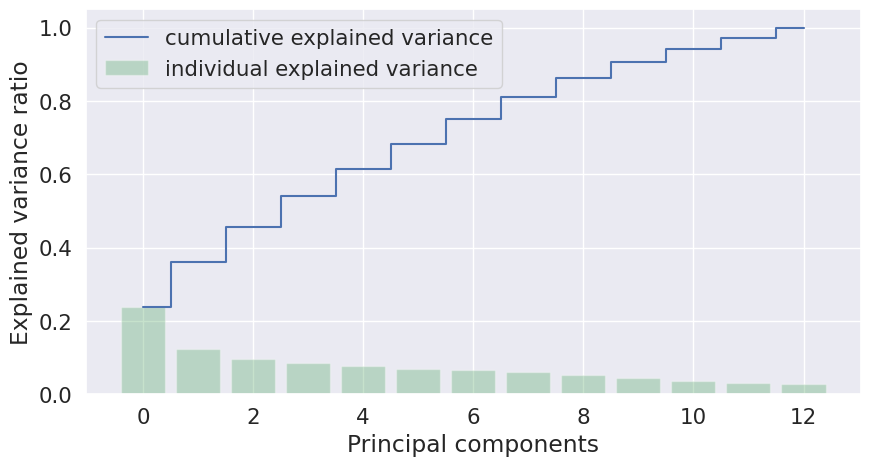

Cumulative explained ratio: [0.23687279 0.35994417 0.45525771 0.53959809 0.61542842 0.68335886
 0.74987574 0.80971274 0.86259744 0.90594572 0.94120605 0.97278203
 1.        ]


In [79]:
cum_var_ratio = np.cumsum(var_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_ratio)),
        var_ratio,
        alpha=0.3333,
        align='center',
        label='individual explained variance',
        color = 'g')
plt.step(range(len(cum_var_ratio)),
         cum_var_ratio,
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

print("Cumulative explained ratio:",cum_var_ratio)

In [80]:
pca = PCA(n_components=10, random_state=42)
pca.fit(X_norm)
norm_pca_array = pca.transform(X_norm)
norm_pca = pd.DataFrame(data=norm_pca_array, columns = ['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])


In [81]:
X_train_norm_pca, X_test_norm_pca, Y_train_norm_pca, Y_test_norm_pca = train_test_split(norm_pca,y, test_size=ukuran_test, random_state=42)

## BAB 8 – (J.62DMI00.013.1) membangun model

### menggunakan Decision Tree

In [82]:
parameters_dt = {
                "model__max_depth": np.arange(1,10),
                "model__min_samples_leaf": np.arange(1,10,2),
                "model__min_samples_split": np.arange(2,10),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [42]
}

In [83]:
classifier_dt_pipeline = Pipeline([
                          ('model',DecisionTreeClassifier())
                          ])

#### Pemodelan data original

In [84]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [85]:
ori_classifier_dt.fit(X_train,Y_train.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'model__min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__random_state': [42]})

In [86]:
ori_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        random_state=42))])

In [87]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 3
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 42


#### Pemodelan data original PCA

In [88]:
ori_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [89]:
ori_pca_classifier_dt.fit(X_train_pca,Y_train_pca.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'model__min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__random_state': [42]})

In [90]:
ori_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=1, random_state=42))])

In [91]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_pca_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 1
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 42


#### Pemodelan data normal

In [93]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [94]:
norm_classifier_dt.fit(X_train_norm,Y_train_norm.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'model__min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__random_state': [42]})

In [95]:
norm_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        random_state=42))])

In [96]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 3
model__min_samples_leaf: 1
model__min_samples_split: 2
model__random_state: 42


#### Pemodelan data normal PCA

In [97]:
norm_pca_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=2, n_jobs=-1)

In [98]:
norm_pca_classifier_dt.fit(X_train_norm_pca,Y_train_norm_pca.ravel())

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'model__min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'model__random_state': [42]})

In [99]:
norm_pca_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(max_depth=3, min_samples_leaf=7,
                                        random_state=42))])

In [100]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_pca_classifier_dt.best_params_[param_name]))

model__criterion: 'gini'
model__max_depth: 3
model__min_samples_leaf: 7
model__min_samples_split: 2
model__random_state: 42


## BAB 9 – (J.62DMI00.014.1) mengevaluasi hasil pemodelan

### evaluasi data original

In [101]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)

ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)

ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.6470588235294118
Precision pada training set:  0.6470588235294118
Recall pada training set:  0.6470588235294118
Akurasi pada test set:  0.5483870967741935
Precision pada test set:  0.5483870967741935
Recall pada test set:  0.5483870967741935


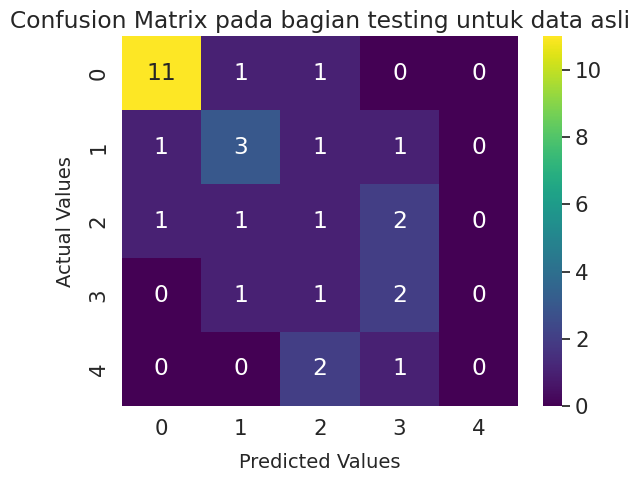

In [102]:
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### Evaluasi data original PCA

In [103]:
ori_pca_y_pred_dt_train = ori_pca_classifier_dt.predict(X_train_pca)

ori_pca_accuracy_dt_train = accuracy_score(Y_train_pca,ori_pca_y_pred_dt_train)
print('Akurasi pada training set: ', ori_pca_accuracy_dt_train)

ori_pca_precision_dt_train = precision_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_pca_precision_dt_train)

ori_pca_recall_dt_train = recall_score(Y_train_pca,ori_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_pca_recall_dt_train)

ori_pca_y_pred_dt_test = ori_pca_classifier_dt.predict(X_test_pca)

ori_pca_accuracy_dt_test = accuracy_score(Y_test_pca,ori_pca_y_pred_dt_test)
print('Akurasi pada test set: ', ori_pca_accuracy_dt_test)

ori_pca_precision_dt_test = precision_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_pca_precision_dt_test)

ori_pca_recall_dt_test = recall_score(Y_test_pca,ori_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_pca_recall_dt_test)

Akurasi pada training set:  0.5551470588235294
Precision pada training set:  0.5551470588235294
Recall pada training set:  0.5551470588235294
Akurasi pada test set:  0.41935483870967744
Precision pada test set:  0.41935483870967744
Recall pada test set:  0.41935483870967744


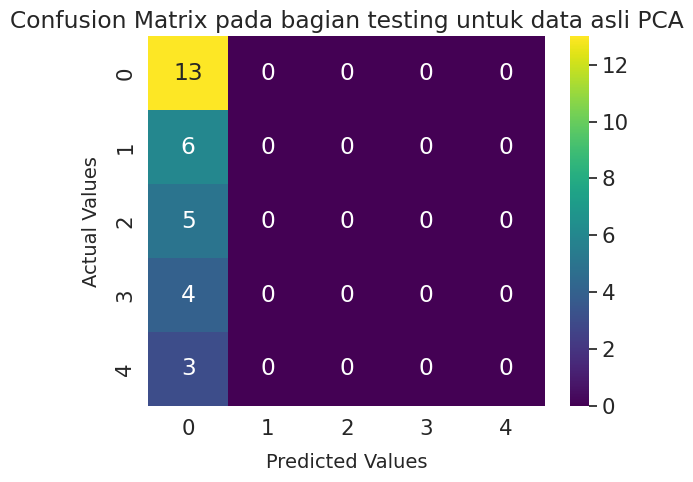

In [104]:
sns.heatmap(confusion_matrix(Y_test_pca,ori_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli PCA')
plt.show()

### Evaluasi data normal

In [105]:
norm_y_pred_dt_train = norm_classifier_dt.predict(X_train_norm)

norm_accuracy_dt_train = accuracy_score(Y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)

norm_precision_dt_train = precision_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)

norm_recall_dt_train = recall_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)

norm_y_pred_dt_test = norm_classifier_dt.predict(X_test_norm)

norm_accuracy_dt_test = accuracy_score(Y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)

norm_precision_dt_test = precision_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_precision_dt_test)

norm_recall_dt_test = recall_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

Akurasi pada training set:  0.6470588235294118
Precision pada training set:  0.6470588235294118
Recall pada training set:  0.6470588235294118
Akurasi pada test set:  0.5483870967741935
Precision pada test set:  0.5483870967741935
Recall pada test set:  0.5483870967741935


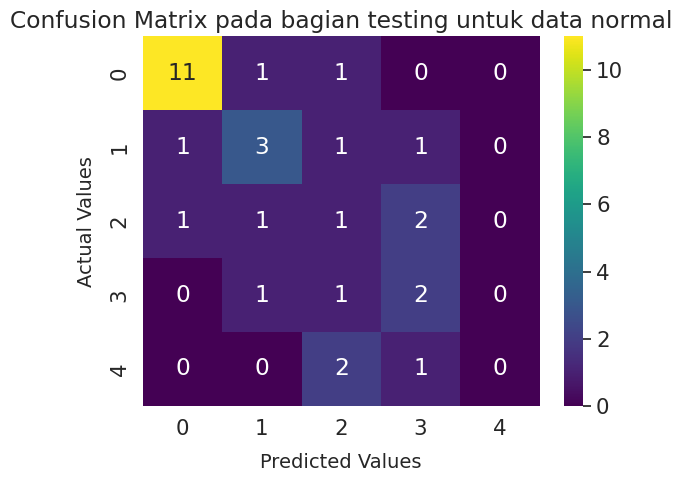

In [107]:
sns.heatmap(confusion_matrix(Y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data normal')
plt.show()

### Evaluasi data normal PCA

In [109]:
norm_pca_y_pred_dt_train = norm_pca_classifier_dt.predict(X_train_norm_pca)

norm_pca_accuracy_dt_train = accuracy_score(Y_train_norm_pca,norm_pca_y_pred_dt_train)
print('Akurasi pada training set: ', norm_pca_accuracy_dt_train)

norm_pca_precision_dt_train = precision_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_pca_precision_dt_train)

norm_pca_recall_dt_train = recall_score(Y_train_norm_pca,norm_pca_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_pca_recall_dt_train)

norm_pca_y_pred_dt_test = norm_pca_classifier_dt.predict(X_test_norm_pca)

norm_pca_accuracy_dt_test = accuracy_score(Y_test_norm_pca,norm_pca_y_pred_dt_test)
print('Akurasi pada test set: ', norm_pca_accuracy_dt_test)

norm_pca_precision_dt_test = precision_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_pca_precision_dt_test)

norm_pca_recall_dt_test = recall_score(Y_test_norm_pca,norm_pca_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_pca_recall_dt_test)

Akurasi pada training set:  0.6801470588235294
Precision pada training set:  0.6801470588235294
Recall pada training set:  0.6801470588235294
Akurasi pada test set:  0.5483870967741935
Precision pada test set:  0.5483870967741935
Recall pada test set:  0.5483870967741935


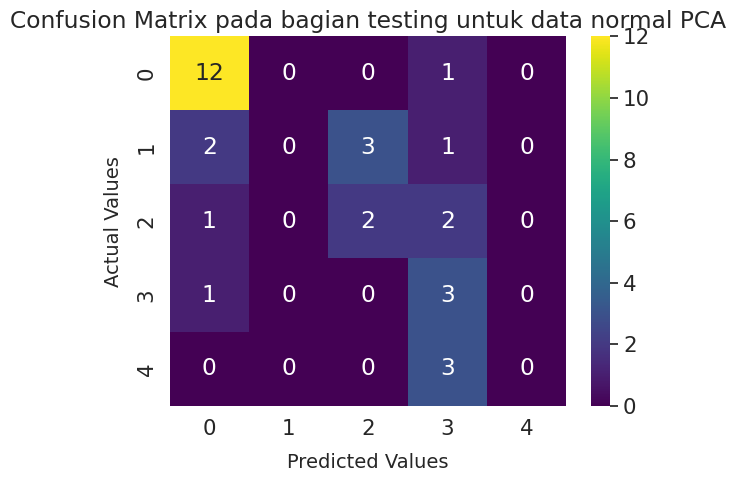

In [110]:
sns.heatmap(confusion_matrix(Y_test_norm_pca,norm_pca_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data normal PCA')
plt.show()

In [111]:
models = [
          ('Machine Learning Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
          ('Machine Learning Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test),
          ('Machine Learning PCA Data Original', ori_pca_accuracy_dt_train, ori_pca_accuracy_dt_test),
          ('Machine Learning PCA Data Normalisasi', norm_pca_accuracy_dt_train, norm_pca_accuracy_dt_test),
         ]

In [112]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Machine Learning Data Original,0.647059,0.548387
1,Machine Learning Data Normalisasi,0.647059,0.548387
2,Machine Learning PCA Data Original,0.555147,0.419355
3,Machine Learning PCA Data Normalisasi,0.680147,0.548387


In [113]:
models_comparison = [
                        ('Machine Learning Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test),
                        ('Machine Learning Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test),
                        ('Machine Learning PCA Data Original', ori_pca_accuracy_dt_test, ori_pca_recall_dt_test, ori_pca_precision_dt_test),
                        ('Machine Learning PCA Data Normalisasi', norm_pca_accuracy_dt_test, norm_pca_recall_dt_test, norm_pca_precision_dt_test),
                    ]

In [114]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Machine Learning Data Original,0.548387,0.548387,0.548387
1,Machine Learning Data Normalisasi,0.548387,0.548387,0.548387
2,Machine Learning PCA Data Original,0.419355,0.419355,0.419355
3,Machine Learning PCA Data Normalisasi,0.548387,0.548387,0.548387


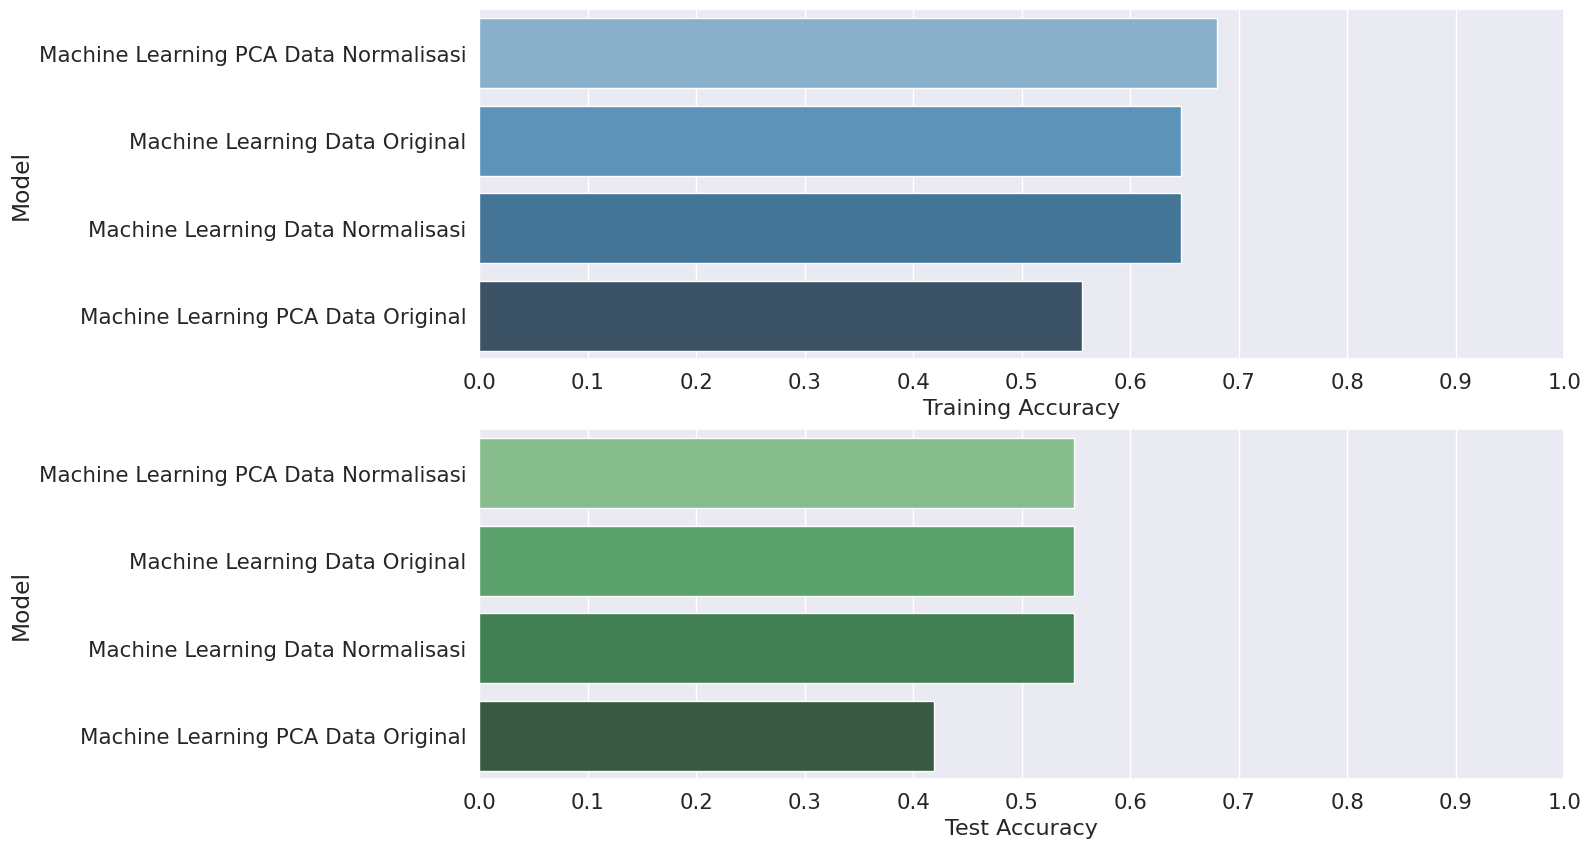

In [115]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

### Hasil terbaik akan dilihat Tree nya (Studi Kasus Machine Learning data original)

In [116]:
from sklearn import tree

In [117]:
# feature_importances = ori_classifier_dt.best_estimator_.named_steps["model"].feature_importances_
# feature_importances

In [118]:
def Analize_Feature(model,X_test):
    aux_dic = {'name':[],'coef':[]}
    pd.set_option('display.max_rows',len(X_test.columns))
    for name, importance in zip(X_test.columns,model.best_estimator_.named_steps["model"].feature_importances_):
        aux_dic['name'].append(name)
        aux_dic['coef'].append(importance)
        df_features_importance = pd.DataFrame(aux_dic)
    print(df_features_importance.sort_values(by='coef',ascending=False))
    return df_features_importance
Analize_Feature(ori_classifier_dt,X_test)

        name      coef
12      Thal  0.383402
11        Ca  0.149323
9    Oldpeak  0.138392
2         Cp  0.095387
7    Thalach  0.089992
4       Chol  0.075677
0        Age  0.067828
1        Sex  0.000000
3   Trestbps  0.000000
5        Fbs  0.000000
6    Restecg  0.000000
8      Exang  0.000000
10     Slope  0.000000


,name,coef
0,Age,0.067828
1,Sex,0.000000
2,Cp,0.095387
3,Trestbps,0.000000
4,Chol,0.075677
5,Fbs,0.000000
6,Restecg,0.000000
7,Thalach,0.089992
8,Exang,0.000000
9,Oldpeak,0.138392


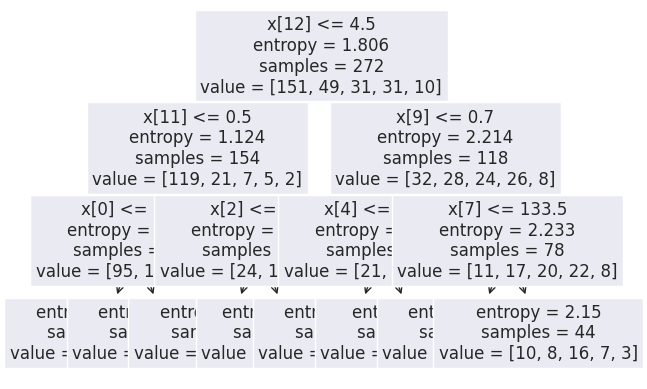

In [120]:
tree.plot_tree(ori_classifier_dt.best_estimator_.named_steps["model"], fontsize=12)
plt.show()

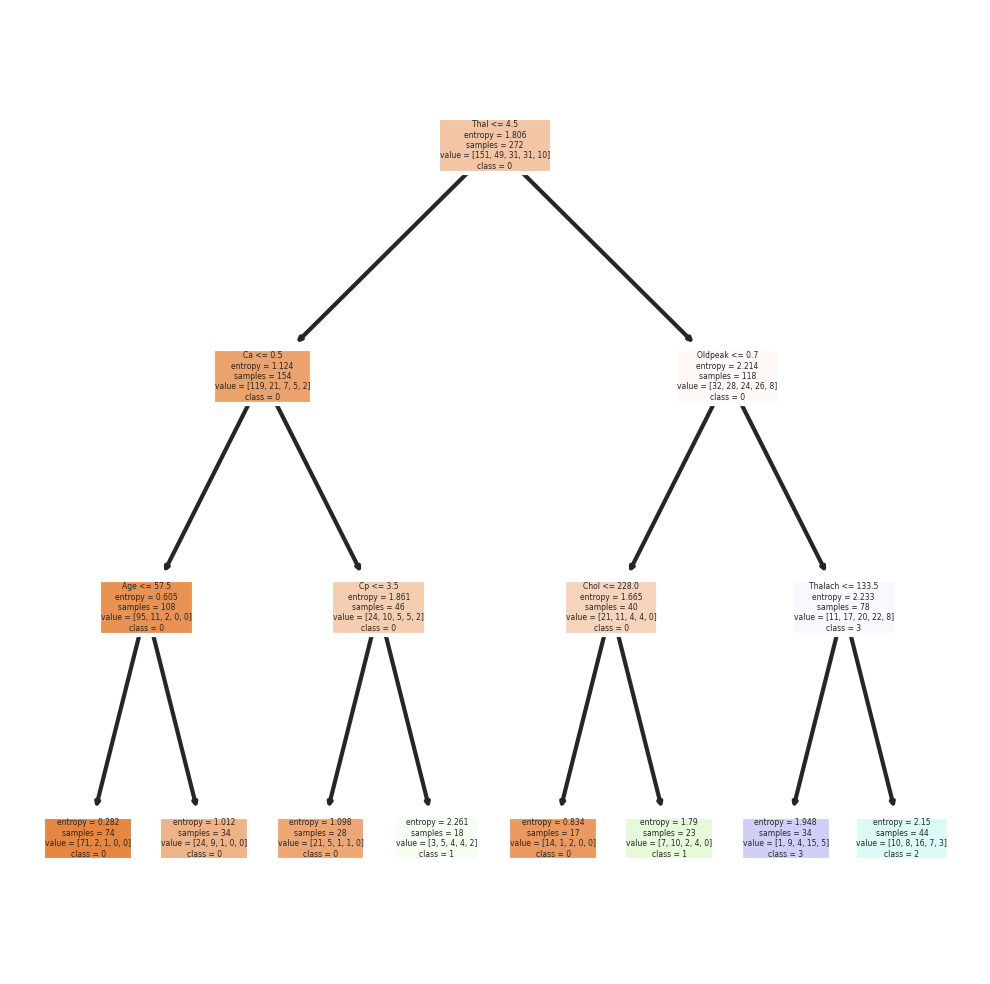

In [121]:
fn=['Age','Sex','Cp','Trestbps','Chol','Fbs','Restecg','Thalach','Exang','Oldpeak','Slope','Ca','Thal']
cn=['0','1','2','3','4']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(ori_classifier_dt.best_estimator_.named_steps["model"],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

cara baca:
Jika Bilirubin <=2.45 maka ke node kiri, selain itu ke kanan.

### Hasil terbaik akan dilihat Tree nya (Studi Kasus Machine Learning data PCA Normalisasi)

In [153]:
Analize_Feature(norm_pca_classifier_dt,X_test_norm_pca)

  name      coef
0  PC0  0.736666
5  PC5  0.179415
7  PC7  0.062445
3  PC3  0.021474
1  PC1  0.000000
2  PC2  0.000000
4  PC4  0.000000
6  PC6  0.000000
8  PC8  0.000000
9  PC9  0.000000


,name,coef
0,PC0,0.736666
1,PC1,0.000000
2,PC2,0.000000
3,PC3,0.021474
4,PC4,0.000000
5,PC5,0.179415
6,PC6,0.000000
7,PC7,0.062445
8,PC8,0.000000
9,PC9,0.000000


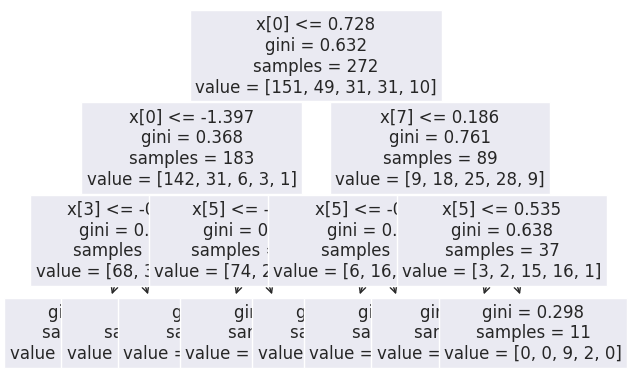

In [141]:
tree.plot_tree(norm_pca_classifier_dt.best_estimator_.named_steps["model"], fontsize=12)
plt.show()

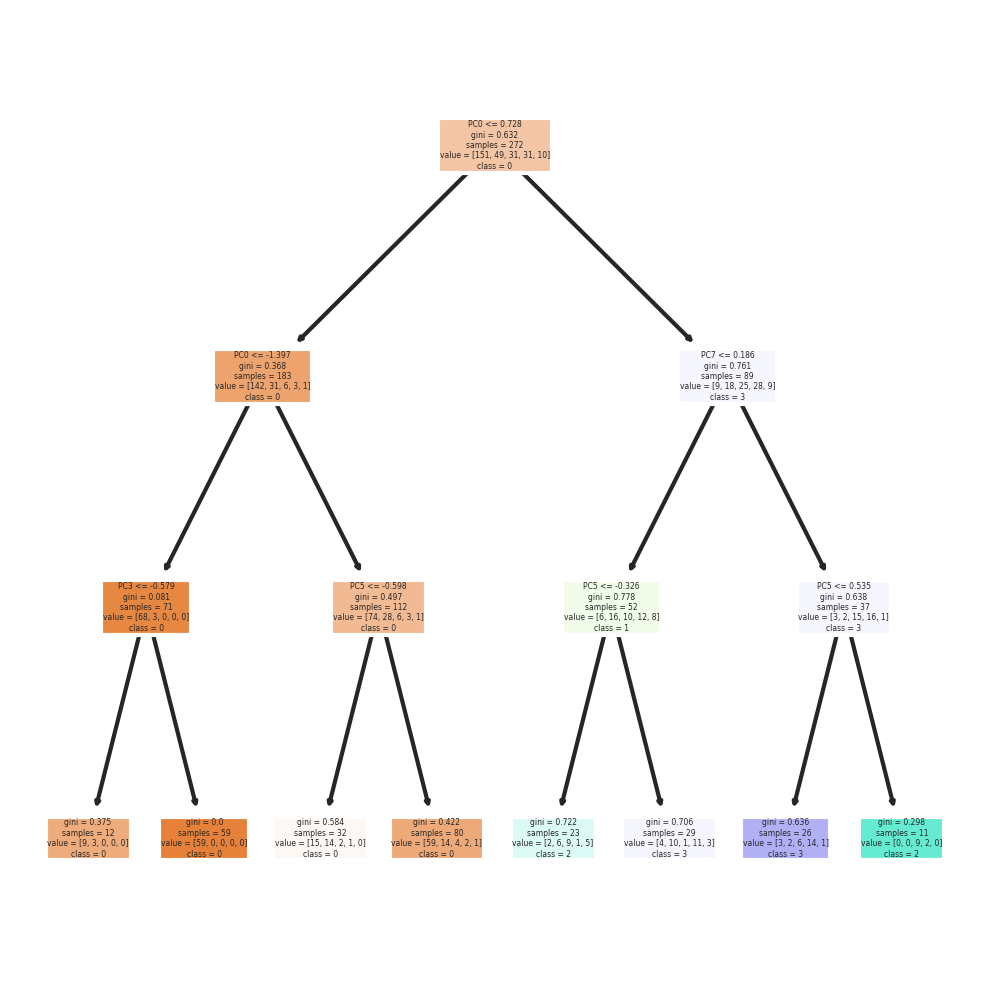

In [152]:
fn=['PC0','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']
cn=['0','1','2','3','4']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(norm_pca_classifier_dt.best_estimator_.named_steps["model"],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')